In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage.measure import find_contours
import pylidc as pl
from pylidc.utils import consensus
import SimpleITK as sitk
from radiomics import featureextractor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix


Loading dicom files ... This may take a moment.
Nódulo 1 - Características do Radiologista: [3 1 6 5 5 1 1 5 2]
Nódulo 2 - Características do Radiologista: [4 1 6 3 5 2 1 5 3]
Nódulo 3 - Características do Radiologista: [4 1 6 4 5 2 1 5 3]
Nódulo 4 - Características do Radiologista: [3 1 6 4 5 1 1 5 3]


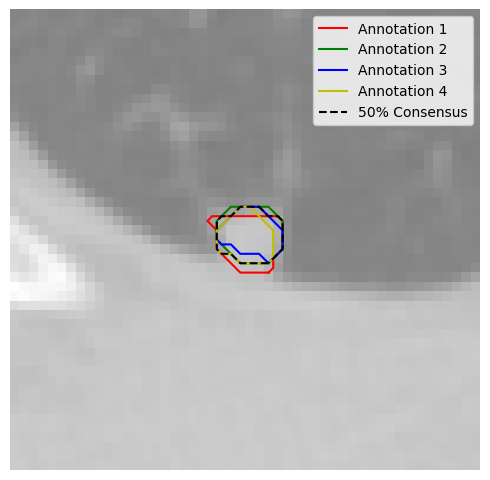

Nódulo 1 - Características do Radiologista: [3 1 6 5 5 1 1 5 2]
Nódulo 2 - Características do Radiologista: [4 1 6 3 5 1 2 5 3]
Nódulo 3 - Características do Radiologista: [4 1 6 4 5 1 1 5 3]
Nódulo 4 - Características do Radiologista: [3 1 6 4 5 1 1 5 4]


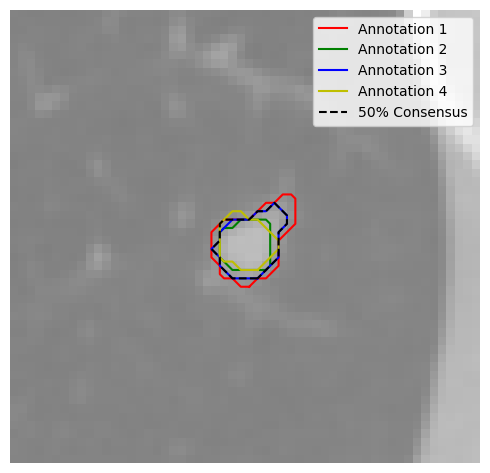

Nódulo 1 - Características do Radiologista: [3 1 6 5 5 1 1 5 2]
Nódulo 2 - Características do Radiologista: [5 1 6 3 5 1 3 5 4]
Nódulo 3 - Características do Radiologista: [5 1 6 4 5 2 1 5 5]
Nódulo 4 - Características do Radiologista: [4 1 6 4 4 1 1 5 3]


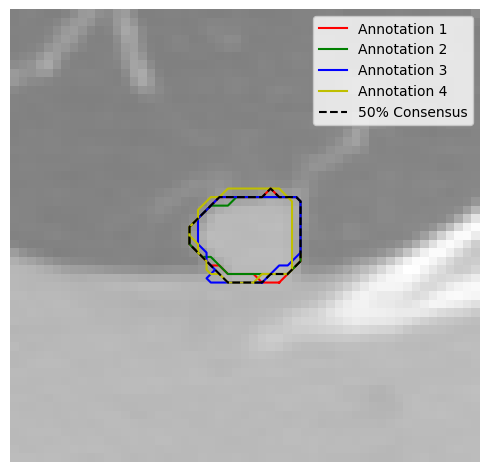

Nódulo 1 - Características do Radiologista: [4 1 6 3 5 1 2 5 3]
Nódulo 2 - Características do Radiologista: [3 1 6 4 5 2 1 5 2]


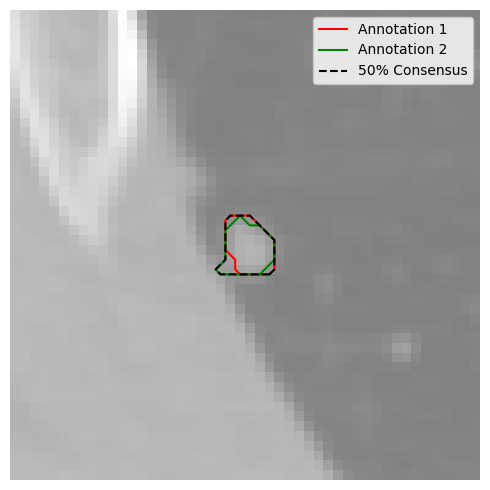

Nódulo 1 - Características do Radiologista: [3 1 6 5 5 1 1 5 2]
Nódulo 2 - Características do Radiologista: [5 1 6 4 5 1 2 5 4]
Nódulo 3 - Características do Radiologista: [5 1 6 3 5 1 1 5 5]
Nódulo 4 - Características do Radiologista: [4 1 6 4 5 1 1 5 3]


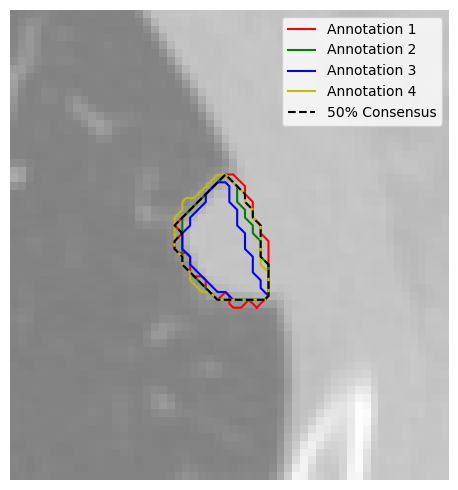

Nódulo 1 - Características do Radiologista: [3 1 6 5 5 1 1 5 2]
Nódulo 2 - Características do Radiologista: [5 1 6 5 5 2 3 5 4]
Nódulo 3 - Características do Radiologista: [5 1 6 4 5 3 2 5 5]
Nódulo 4 - Características do Radiologista: [4 1 6 4 5 1 2 5 4]


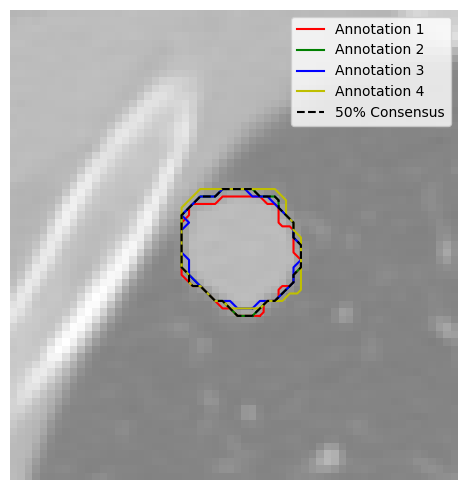

In [58]:
# identificção do ID do paciente
patient_id = 'LIDC-IDRI-0068'

# Consulta para obter todas as varreduras do paciente com anotações
scans_with_annotations = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id, pl.Scan.annotations.any()).all()

# Cores para traçar os contornos das anotações
colors = ['r', 'g', 'b', 'y']

# Iterar através de todas as varreduras do paciente
for scan in scans_with_annotations:
    # Converta a varredura em um volume de array
    vol = scan.to_volume()
    
    # Clusterize as anotações para a varredura e pegue todas
    nods = scan.cluster_annotations()
    
    # Iterar através de todos os nódulos do paciente
    for anns in nods:
        # Realize a consolidação de consenso e nível de acordo de 50%
        cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])
        
        
        
        # Obtenha a fatia central da caixa delimitadora calculada
        k = int(0.5 * (cbbox[2].stop - cbbox[2].start))
        
        # desenho da imagem
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        ax.imshow(vol[cbbox][:, :, k], cmap=plt.cm.gray, alpha=0.5)
        
        # Plot os contornos das anotações para a fatia k
        for j, mask in enumerate(masks):
            current_color = colors[j % len(colors)]  # Ciclo de cores 
            for c in find_contours(mask[:, :, k].astype(float), 0.5):
                label = "Annotation %d" % (j+1)
                plt.plot(c[:, 1], c[:, 0], current_color, label=label)
                
            # Extrair as características do nódulo
            characteristics = anns[j].feature_vals()
            print(f"Nódulo {j + 1} - Características do Radiologista: {characteristics}")
        
        # Plot o contorno de consenso de 50% para a fatia k
        for c in find_contours(cmask[:, :, k].astype(float), 0.5):
            plt.plot(c[:, 1], c[:, 0], '--k', label='50% Consensus')
        
        ax.axis('off')
        ax.legend()
        plt.tight_layout()
        plt.show()

Loading dicom files ... This may take a moment.
Média das Características para o Nódulo: [4. 1. 6. 4. 5. 2. 1. 5. 3.]


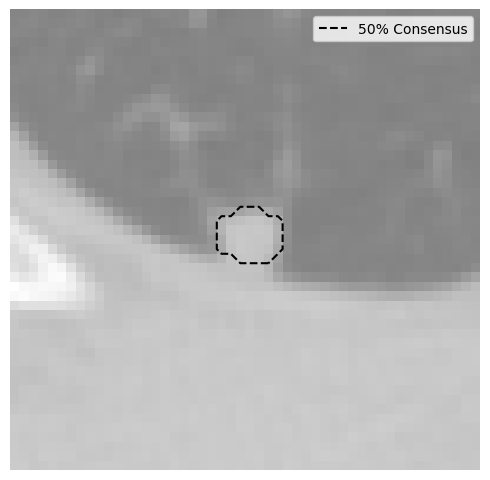

Média das Características para o Nódulo: [4. 1. 6. 4. 5. 1. 1. 5. 3.]


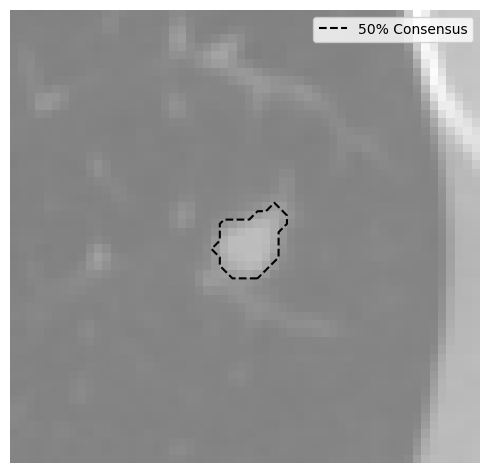

Média das Características para o Nódulo: [4. 1. 6. 4. 5. 1. 2. 5. 4.]


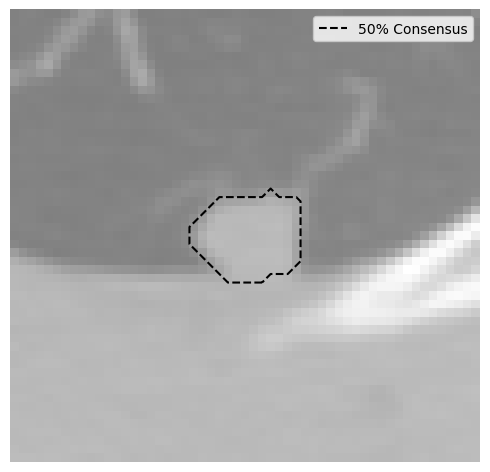

Média das Características para o Nódulo: [4. 1. 6. 4. 5. 2. 2. 5. 2.]


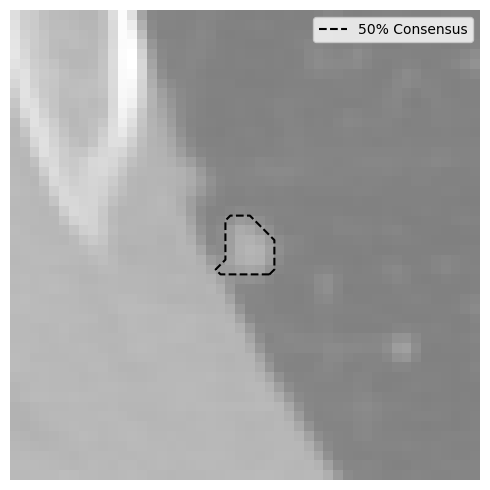

Média das Características para o Nódulo: [4. 1. 6. 4. 5. 1. 1. 5. 4.]


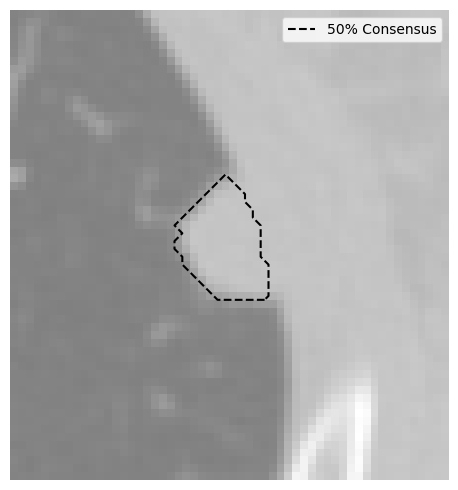

Média das Características para o Nódulo: [4. 1. 6. 4. 5. 2. 2. 5. 4.]


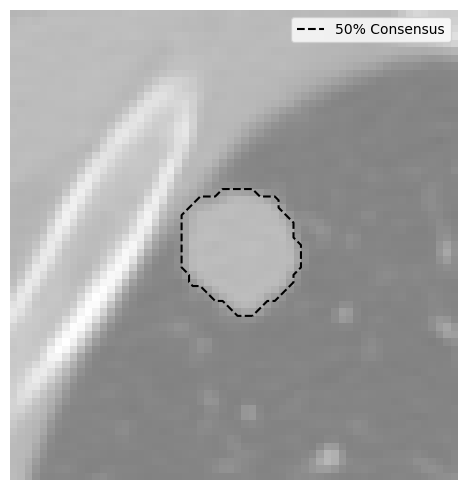

In [59]:
# identificção do ID do paciente
patient_id = 'LIDC-IDRI-0068'

# Consulta para obter todas as varreduras do paciente com anotações
scans_with_annotations = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id, pl.Scan.annotations.any()).all()

# Cores para traçar os contornos das anotações
colors = ['r', 'g', 'b', 'y']

# Iterar através de todas as varreduras do paciente
for scan in scans_with_annotations:
    # Converta a varredura em um volume de array
    vol = scan.to_volume()
    
    # Clusterize as anotações para a varredura e pegue todas
    nods = scan.cluster_annotations()
    
    
    # Iterar através de todos os nódulos do paciente
    for anns in nods:
        # Realize a consolidação de consenso e nível de acordo de 50%
        cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])
        
        # Obtenha a fatia central da caixa delimitadora calculada
        k = int(0.5 * (cbbox[2].stop - cbbox[2].start))
        
        # Configure o gráfico
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        ax.imshow(vol[cbbox][:, :, k], cmap=plt.cm.gray, alpha=0.5)
        
        nodule_characteristics = []
        
        
        
        # Plot os contornos das anotações para a fatia k
        for j, mask in enumerate(masks):
            #current_color = colors[j % len(colors)]  # Ciclo de cores se necessário
            #for c in find_contours(mask[:, :, k].astype(float), 0.5):
                #label = "Annotation %d" % (j+1)
                #plt.plot(c[:, 1], c[:, 0], current_color, label=label)
                
            # Extrair as características do nódulo
            characteristics = anns[j].feature_vals()
            nodule_characteristics.append(characteristics)
        
        # Caso haja carateristicas no nodulo, calcular a média 
        if nodule_characteristics:
            nodule_mean_characteristics = np.mean(nodule_characteristics, axis=0)
            nodule_mean_characteristics = np.round(nodule_mean_characteristics, decimals=0)
            print(f"Média das Características para o Nódulo: {nodule_mean_characteristics}")
        
        # Plot o contorno de consenso de 50% para a fatia k
        for c in find_contours(cmask[:, :, k].astype(float), 0.5):
            plt.plot(c[:, 1], c[:, 0], '--k', label='50% Consensus')
        
        ax.axis('off')
        ax.legend()
        plt.tight_layout()
        plt.show()

In [60]:
# Configurar o extrator de características do PyRadiomics
extractor = featureextractor.RadiomicsFeatureExtractor()

# Consultar todas as varreduras com anotações
scans_with_annotations = pl.query(pl.Scan).filter(pl.Scan.annotations.any()).all()

# Lista para armazenar as características
features_list = []

# Lista para armazenar o ID do paciente correspondente a cada nódulo
patient_ids = []

# Iterar através de todas as varreduras com anotações
for scan in scans_with_annotations:
    # Obter o ID do paciente
    patient_id = scan.patient_id
    
    # Clusterize as anotações para a varredura e pegue todas
    nods = scan.cluster_annotations()
    
    # Iterar através de todos os nódulos do paciente
    for anns in nods:
        # Realize a consolidação de consenso e nível de acordo de 50%
        cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])
        
        # Converter a matriz de pixels para uma imagem SimpleITK
        image = sitk.GetImageFromArray(cmask.astype(float))
            
        # Extrair características radiômicas usando PyRadiomics
        features = extractor.execute(image, image, label=1)  #  
        
        nodule_characteristics = []
        
        for j, mask in enumerate(masks):
            characteristics = anns[j].feature_vals()
            nodule_characteristics.append(characteristics)
        
        # Se houver características para este nódulo, calcule a média e imprima
        if nodule_characteristics:
            nodule_mean_characteristics = np.mean(nodule_characteristics, axis=0)
            nodule_mean_characteristics = np.round(nodule_mean_characteristics, decimals=0)
        
        # Adicionar o ID do paciente à lista
        features['Patient_ID'] = patient_id
        features['Nodule_ID'] = anns[0].id  # ID do nódulo
        
        #carateristicas do xml
        features['Subtlety'] = nodule_mean_characteristics[0]
        features['Internalstructure'] = nodule_mean_characteristics[1]
        features['Calcification'] = nodule_mean_characteristics[2]
        features['Sphericity'] = nodule_mean_characteristics[3]
        features['Margin'] = nodule_mean_characteristics[4]
        features['Lobulation'] = nodule_mean_characteristics[5]
        features['Spiculation'] = nodule_mean_characteristics[6]
        features['Texture'] = nodule_mean_characteristics[7]
        features['Malignancy'] = nodule_mean_characteristics[8]
        
        
        # Adicionar as características à lista
        features_list.append(features)

# Converter a lista de características em um DataFrame do pandas
features_df = pd.DataFrame(features_list)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [61]:
pd.set_option('display.max_columns', None) # mostrar todas as colunas do dataframe e os seus dados 

In [62]:
features_df

diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                              v3.1.0                     1.23.5   
1                              v3.1.0                     1.23.5   
2                              v3.1.0                     1.23.5   
3                              v3.1.0                     1.23.5   
4                              v3.1.0                     1.23.5   
...                               ...                        ...   
2646                           v3.1.0                     1.23.5   
2647                           v3.1.0                     1.23.5   
2648                           v3.1.0                     1.23.5   
2649                           v3.1.0                     1.23.5   
2650                           v3.1.0                     1.23.5   

     diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                             2.3.0                          1.3.0   
1                             2.3.0                          1.3.0   
2                             2.3.0                          1.3.0   
3                             2.3.0                          1.3.0   
4                             2.3.0                          1.3.0   
...                             ...                            ...   
2646                          2.3.0                          1.3.0   
2647                          2.3.0                          1.3.0   
2648                          2.3.0                          1.3.0   
2649                          2.3.0                          1.3.0   
2650                          2.3.0                          1.3.0   

     diagnostics_Versions_Python  \
0                         3.9.13   
1                         3.9.13   
2                         3.9.13   
3                         3.9.13   
4                         3.9.13   
...                          ...   
2646                      3.9.13   
2647                      3.9.13   
2648                      3.9.13   
2649                      3.9.13   
2650                      3.9.13   

                     diagnostics_Configuration_Settings  \
0     {'minimumROIDimensions': 2, 'minimumROISize': ...   
1     {'minimumROIDimensions': 2, 'minimumROISize': ...   
2     {'minimumROIDimensions': 2, 'minimumROISize': ...   
3     {'minimumROIDimensions': 2, 'minimumROISize': ...   
4     {'minimumROIDimensions': 2, 'minimumROISize': ...   
...                                                 ...   
2646  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2647  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2648  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2649  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2650  {'minimumROIDimensions': 2, 'minimumROISize': ...   

     diagnostics_Configuration_EnabledImageTypes  \
0                               {'Original': {}}   
1                               {'Original': {}}   
2                               {'Original': {}}   
3                               {'Original': {}}   
4                               {'Original': {}}   
...                                          ...   
2646                            {'Original': {}}   
2647                            {'Original': {}}   
2648                            {'Original': {}}   
2649                            {'Original': {}}   
2650                            {'Original': {}}   

               diagnostics_Image-original_Hash  \
0     966db6c8d814983bbfe7125907b2ae5008c7994e   
1     d750f93365c734f6f1972e806b046bb1a203f47f   
2     58d9ee5073ad7215556c1e295a67e9204a623b2d   
3     312913e3e22bc6f2e6cffc8abd1120da5fa413fd   
4     08706c40effcb9f7489dc9ce0139a265b8dc6048   
...                                        ...   
2646  db18dcbfdf1ebd1c1390db9dd1fbfd85cce4724b   
2647  fe63df501e056c7f875ab771151194481c70a0b1   
2648  e25d0da08cbc45ea3587c9426cc102940176a4de   
2649  5888efc13966913742433819826d00f4d79f0c24   
2650  13269d945ba36fb2fbefd307

In [63]:
features_df.to_csv('all_features.csv', index=False) #guardar os dados num csv

In [64]:
#leitura do csv
path = 'C:/Users/Hp/3 ano/LAB IACD/all_features.csv'
df = pd.read_csv(path)
df

diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                              v3.1.0                     1.23.5   
1                              v3.1.0                     1.23.5   
2                              v3.1.0                     1.23.5   
3                              v3.1.0                     1.23.5   
4                              v3.1.0                     1.23.5   
...                               ...                        ...   
2646                           v3.1.0                     1.23.5   
2647                           v3.1.0                     1.23.5   
2648                           v3.1.0                     1.23.5   
2649                           v3.1.0                     1.23.5   
2650                           v3.1.0                     1.23.5   

     diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                             2.3.0                          1.3.0   
1                             2.3.0                          1.3.0   
2                             2.3.0                          1.3.0   
3                             2.3.0                          1.3.0   
4                             2.3.0                          1.3.0   
...                             ...                            ...   
2646                          2.3.0                          1.3.0   
2647                          2.3.0                          1.3.0   
2648                          2.3.0                          1.3.0   
2649                          2.3.0                          1.3.0   
2650                          2.3.0                          1.3.0   

     diagnostics_Versions_Python  \
0                         3.9.13   
1                         3.9.13   
2                         3.9.13   
3                         3.9.13   
4                         3.9.13   
...                          ...   
2646                      3.9.13   
2647                      3.9.13   
2648                      3.9.13   
2649                      3.9.13   
2650                      3.9.13   

                     diagnostics_Configuration_Settings  \
0     {'minimumROIDimensions': 2, 'minimumROISize': ...   
1     {'minimumROIDimensions': 2, 'minimumROISize': ...   
2     {'minimumROIDimensions': 2, 'minimumROISize': ...   
3     {'minimumROIDimensions': 2, 'minimumROISize': ...   
4     {'minimumROIDimensions': 2, 'minimumROISize': ...   
...                                                 ...   
2646  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2647  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2648  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2649  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2650  {'minimumROIDimensions': 2, 'minimumROISize': ...   

     diagnostics_Configuration_EnabledImageTypes  \
0                               {'Original': {}}   
1                               {'Original': {}}   
2                               {'Original': {}}   
3                               {'Original': {}}   
4                               {'Original': {}}   
...                                          ...   
2646                            {'Original': {}}   
2647                            {'Original': {}}   
2648                            {'Original': {}}   
2649                            {'Original': {}}   
2650                            {'Original': {}}   

               diagnostics_Image-original_Hash  \
0     966db6c8d814983bbfe7125907b2ae5008c7994e   
1     d750f93365c734f6f1972e806b046bb1a203f47f   
2     58d9ee5073ad7215556c1e295a67e9204a623b2d   
3     312913e3e22bc6f2e6cffc8abd1120da5fa413fd   
4     08706c40effcb9f7489dc9ce0139a265b8dc6048   
...                                        ...   
2646  db18dcbfdf1ebd1c1390db9dd1fbfd85cce4724b   
2647  fe63df501e056c7f875ab771151194481c70a0b1   
2648  e25d0da08cbc45ea3587c9426cc102940176a4de   
2649  5888efc13966913742433819826d00f4d79f0c24   
2650  13269d945ba36fb2fbefd307

# Colunas todas iguais

In [65]:
# Função para remover colunas com a maioria dos valores iguais
def remove_columns_with_mostly_equal_values(df, threshold):
    num_rows = len(df)
    for col in df.columns:
        value_counts = df[col].value_counts()
        max_count = value_counts.max()
        if (max_count / num_rows) >= threshold:
            df = df.drop(col, axis=1)
    return df

# Defina um limite de similaridade (threshold)
threshold = 0.9

# Remover as colunas com a maioria dos valores iguais
df = remove_columns_with_mostly_equal_values(df, threshold)

In [66]:
df

diagnostics_Image-original_Hash  \
0     966db6c8d814983bbfe7125907b2ae5008c7994e   
1     d750f93365c734f6f1972e806b046bb1a203f47f   
2     58d9ee5073ad7215556c1e295a67e9204a623b2d   
3     312913e3e22bc6f2e6cffc8abd1120da5fa413fd   
4     08706c40effcb9f7489dc9ce0139a265b8dc6048   
...                                        ...   
2646  db18dcbfdf1ebd1c1390db9dd1fbfd85cce4724b   
2647  fe63df501e056c7f875ab771151194481c70a0b1   
2648  e25d0da08cbc45ea3587c9426cc102940176a4de   
2649  5888efc13966913742433819826d00f4d79f0c24   
2650  13269d945ba36fb2fbefd307f1fa513918911e5c   

     diagnostics_Image-original_Size  diagnostics_Image-original_Mean  \
0                        (6, 84, 74)                         0.051024   
1                        (6, 67, 80)                         0.054136   
2                        (2, 47, 48)                         0.007535   
3                        (8, 80, 90)                         0.063299   
4                        (9, 59, 66)                         0.014866   
...                              ...                              ...   
2646                    (10, 58, 55)                         0.010188   
2647                    (11, 54, 55)                         0.019069   
2648                     (3, 57, 53)                         0.020854   
2649                     (4, 50, 52)                         0.007404   
2650                    (13, 92, 91)                         0.126805   

                diagnostics_Mask-original_Hash diagnostics_Mask-original_Size  \
0     916fa76fc2ef7083acad0f0a5b4ae605e176a590                    (6, 84, 74)   
1     21bb257f501d97fdac963a3eed3bc79763808d45                    (6, 67, 80)   
2     69eb0f6ec04ddf064cd30ecaaab2da630ee49849                    (2, 47, 48)   
3     5a014e3c44e80c29336a84747194b1bf20aa48ef                    (8, 80, 90)   
4     0e09298de81c2adef7164a13f222f85b3079fe33                    (9, 59, 66)   
...                                        ...                            ...   
2646  963a7955ee5420a87b6a515b492cca8fc89e3993                   (10, 58, 55)   
2647  a7ae2e2729f721b44722634bb7c16d378fdedc2b                   (11, 54, 55)   
2648  5ee5cad2f9071e80d65abc9086faefb7e2ada532                    (3, 57, 53)   
2649  edb26895286ee1ebb94f0dd324b07f3be9624c33                    (4, 50, 52)   
2650  5512a50e2e618c3cb441f54516c4cb1ae4c05f84                   (13, 92, 91)   

     diagnostics_Mask-original_BoundingBox  \
0                   (0, 26, 21, 6, 33, 31)   
1                   (0, 21, 27, 6, 25, 31)   
2                     (0, 21, 21, 2, 5, 6)   
3                   (0, 23, 24, 8, 35, 43)   
4                   (0, 25, 22, 8, 12, 15)   
...                                    ...   
2646                (1, 23, 24, 9, 13, 10)   
2647               (0, 21, 21, 11, 12, 13)   
2648                (0, 21, 21, 3, 15, 11)   
2649                  (0, 21, 22, 4, 8, 8)   
2650               (0, 21, 21, 13, 48, 49)   

      diagnostics_Mask-original_VoxelNum  \
0                                   1903   
1                                   1741   
2                                     34   
3                                   3646   
4                                    521   
...                                  ...   
2646                                 325   
2647                                 623   
2648                                 189   
2649                                  77   
2650                               13801   

            diagnostics_Mask-original_CenterOfMassIndex  \
0     (2.606936416184971, 45.86600105097215, 38.7924...   
1     (2.090178058587019, 31.88684663986215, 43.5117...   
2     (0.2647058823529412, 23.323529411764707, 23.67...   
3     (3.593801426220516, 37.13055403181569, 44.0181...   
4     (4.113243761996161, 30.23608445297505, 29.5854...   
...                                                 ...   
2646  (5.9107692307692306, 28.12923076923077, 27.815...   
2647  (5.4

In [67]:
# remoção de algumas colunas desnecessárias
rem=['diagnostics_Image-original_Hash','diagnostics_Image-original_Size','diagnostics_Mask-original_Hash','diagnostics_Mask-original_Size','diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMassIndex','diagnostics_Mask-original_CenterOfMass']
df=df.drop(rem,axis=1)
df

diagnostics_Image-original_Mean  diagnostics_Mask-original_VoxelNum  \
0                            0.051024                                1903   
1                            0.054136                                1741   
2                            0.007535                                  34   
3                            0.063299                                3646   
4                            0.014866                                 521   
...                               ...                                 ...   
2646                         0.010188                                 325   
2647                         0.019069                                 623   
2648                         0.020854                                 189   
2649                         0.007404                                  77   
2650                         0.126805                               13801   

      original_shape_Elongation  original_shape_Flatness  \
0                      0.848594                 0.219031   
1                      0.845360                 0.215045   
2                      0.879310                 0.289526   
3                      0.956858                 0.216692   
4                      0.779886                 0.595806   
...                         ...                      ...   
2646                   0.793847                 0.375133   
2647                   0.754255                 0.687954   
2648                   0.564212                 0.185778   
2649                   0.453474                 0.247844   
2650                   0.909345                 0.273192   

      original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                           5.542891                       25.306411   
1                           5.209030                       24.222923   
2                           1.632763                        5.639429   
3                           6.435946                       29.700850   
4                           7.374952                       12.378110   
...                              ...                             ...   
2646                        4.534490                       12.087678   
2647                        8.589183                       12.485120   
2648                        2.586515                       13.922612   
2649                        2.471175                        9.970706   
2650                       11.674262                       42.732887   

      original_shape_Maximum2DDiameterColumn  \
0                                  24.020824   
1                                  30.016662   
2                                   6.000000   
3                                  37.054015   
4                                  15.524175   
...                                      ...   
2646                               12.806248   
2647                               14.422205   
2648                               11.045361   
2649                                7.280110   
2650                               49.040799   

      original_shape_Maximum2DDiameterRow  \
0                               39.051248   
1                               31.064449   
2                                6.324555   
3                               43.566042   
4                               14.142136   
...                                   ...   
2646                            11.401754   
2647                            14.317821   
2648                            14.866069   
2649                             7.211103   
2650                            50.219518   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                 26.000000                         41.509035   
1                                 23.021729                         31.064449   
2                                  5.099020                          6.324555   
3                                 35.227830          

# Repetidos

In [68]:
#retirar as colunas que apresentam valores repetidos entre elas
double = df[df.columns[df.T.duplicated(keep='first')]] #utiliza a transposta para identificar colunas com valores repetidos 
df = df.drop(columns=double.columns)
df

diagnostics_Image-original_Mean  diagnostics_Mask-original_VoxelNum  \
0                            0.051024                                1903   
1                            0.054136                                1741   
2                            0.007535                                  34   
3                            0.063299                                3646   
4                            0.014866                                 521   
...                               ...                                 ...   
2646                         0.010188                                 325   
2647                         0.019069                                 623   
2648                         0.020854                                 189   
2649                         0.007404                                  77   
2650                         0.126805                               13801   

      original_shape_Elongation  original_shape_Flatness  \
0                      0.848594                 0.219031   
1                      0.845360                 0.215045   
2                      0.879310                 0.289526   
3                      0.956858                 0.216692   
4                      0.779886                 0.595806   
...                         ...                      ...   
2646                   0.793847                 0.375133   
2647                   0.754255                 0.687954   
2648                   0.564212                 0.185778   
2649                   0.453474                 0.247844   
2650                   0.909345                 0.273192   

      original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                           5.542891                       25.306411   
1                           5.209030                       24.222923   
2                           1.632763                        5.639429   
3                           6.435946                       29.700850   
4                           7.374952                       12.378110   
...                              ...                             ...   
2646                        4.534490                       12.087678   
2647                        8.589183                       12.485120   
2648                        2.586515                       13.922612   
2649                        2.471175                        9.970706   
2650                       11.674262                       42.732887   

      original_shape_Maximum2DDiameterColumn  \
0                                  24.020824   
1                                  30.016662   
2                                   6.000000   
3                                  37.054015   
4                                  15.524175   
...                                      ...   
2646                               12.806248   
2647                               14.422205   
2648                               11.045361   
2649                                7.280110   
2650                               49.040799   

      original_shape_Maximum2DDiameterRow  \
0                               39.051248   
1                               31.064449   
2                                6.324555   
3                               43.566042   
4                               14.142136   
...                                   ...   
2646                            11.401754   
2647                            14.317821   
2648                            14.866069   
2649                             7.211103   
2650                            50.219518   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                 26.000000                         41.509035   
1                                 23.021729                         31.064449   
2                                  5.099020                          6.324555   
3                                 35.227830          

In [69]:
# retirar o Patient_Id e o Nodule_id por nao serem necessarios
df=df.drop(['Patient_ID','Nodule_ID'],axis=1)
df

diagnostics_Image-original_Mean  diagnostics_Mask-original_VoxelNum  \
0                            0.051024                                1903   
1                            0.054136                                1741   
2                            0.007535                                  34   
3                            0.063299                                3646   
4                            0.014866                                 521   
...                               ...                                 ...   
2646                         0.010188                                 325   
2647                         0.019069                                 623   
2648                         0.020854                                 189   
2649                         0.007404                                  77   
2650                         0.126805                               13801   

      original_shape_Elongation  original_shape_Flatness  \
0                      0.848594                 0.219031   
1                      0.845360                 0.215045   
2                      0.879310                 0.289526   
3                      0.956858                 0.216692   
4                      0.779886                 0.595806   
...                         ...                      ...   
2646                   0.793847                 0.375133   
2647                   0.754255                 0.687954   
2648                   0.564212                 0.185778   
2649                   0.453474                 0.247844   
2650                   0.909345                 0.273192   

      original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                           5.542891                       25.306411   
1                           5.209030                       24.222923   
2                           1.632763                        5.639429   
3                           6.435946                       29.700850   
4                           7.374952                       12.378110   
...                              ...                             ...   
2646                        4.534490                       12.087678   
2647                        8.589183                       12.485120   
2648                        2.586515                       13.922612   
2649                        2.471175                        9.970706   
2650                       11.674262                       42.732887   

      original_shape_Maximum2DDiameterColumn  \
0                                  24.020824   
1                                  30.016662   
2                                   6.000000   
3                                  37.054015   
4                                  15.524175   
...                                      ...   
2646                               12.806248   
2647                               14.422205   
2648                               11.045361   
2649                                7.280110   
2650                               49.040799   

      original_shape_Maximum2DDiameterRow  \
0                               39.051248   
1                               31.064449   
2                                6.324555   
3                               43.566042   
4                               14.142136   
...                                   ...   
2646                            11.401754   
2647                            14.317821   
2648                            14.866069   
2649                             7.211103   
2650                            50.219518   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                 26.000000                         41.509035   
1                                 23.021729                         31.064449   
2                                  5.099020                          6.324555   
3                                 35.227830          

# Nulos

In [70]:
#verificar a existencia de valores null
df.isnull().sum()

diagnostics_Image-original_Mean                    0
diagnostics_Mask-original_VoxelNum                 0
original_shape_Elongation                          0
original_shape_Flatness                            0
original_shape_LeastAxisLength                     0
original_shape_MajorAxisLength                     0
original_shape_Maximum2DDiameterColumn             0
original_shape_Maximum2DDiameterRow                0
original_shape_Maximum2DDiameterSlice              0
original_shape_Maximum3DDiameter                   0
original_shape_MeshVolume                          0
original_shape_MinorAxisLength                     0
original_shape_Sphericity                          0
original_shape_SurfaceArea                         0
original_shape_SurfaceVolumeRatio                  0
original_gldm_DependenceEntropy                    0
original_gldm_DependenceNonUniformity              0
original_gldm_DependenceNonUniformityNormalized    0
original_gldm_DependenceVariance              

# Normalizar as colunas

In [71]:
df

diagnostics_Image-original_Mean  diagnostics_Mask-original_VoxelNum  \
0                            0.051024                                1903   
1                            0.054136                                1741   
2                            0.007535                                  34   
3                            0.063299                                3646   
4                            0.014866                                 521   
...                               ...                                 ...   
2646                         0.010188                                 325   
2647                         0.019069                                 623   
2648                         0.020854                                 189   
2649                         0.007404                                  77   
2650                         0.126805                               13801   

      original_shape_Elongation  original_shape_Flatness  \
0                      0.848594                 0.219031   
1                      0.845360                 0.215045   
2                      0.879310                 0.289526   
3                      0.956858                 0.216692   
4                      0.779886                 0.595806   
...                         ...                      ...   
2646                   0.793847                 0.375133   
2647                   0.754255                 0.687954   
2648                   0.564212                 0.185778   
2649                   0.453474                 0.247844   
2650                   0.909345                 0.273192   

      original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                           5.542891                       25.306411   
1                           5.209030                       24.222923   
2                           1.632763                        5.639429   
3                           6.435946                       29.700850   
4                           7.374952                       12.378110   
...                              ...                             ...   
2646                        4.534490                       12.087678   
2647                        8.589183                       12.485120   
2648                        2.586515                       13.922612   
2649                        2.471175                        9.970706   
2650                       11.674262                       42.732887   

      original_shape_Maximum2DDiameterColumn  \
0                                  24.020824   
1                                  30.016662   
2                                   6.000000   
3                                  37.054015   
4                                  15.524175   
...                                      ...   
2646                               12.806248   
2647                               14.422205   
2648                               11.045361   
2649                                7.280110   
2650                               49.040799   

      original_shape_Maximum2DDiameterRow  \
0                               39.051248   
1                               31.064449   
2                                6.324555   
3                               43.566042   
4                               14.142136   
...                                   ...   
2646                            11.401754   
2647                            14.317821   
2648                            14.866069   
2649                             7.211103   
2650                            50.219518   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                 26.000000                         41.509035   
1                                 23.021729                         31.064449   
2                                  5.099020                          6.324555   
3                                 35.227830          

In [72]:
# Colunas a normalizar
columns_to_normalize = ['diagnostics_Image-original_Mean',
                        'diagnostics_Mask-original_VoxelNum','original_shape_Elongation',
                        'original_shape_Flatness','original_shape_LeastAxisLength',
                        'original_shape_MajorAxisLength','original_shape_Maximum2DDiameterColumn',
                        'original_shape_Maximum2DDiameterRow','original_shape_Maximum2DDiameterSlice',
                        'original_shape_Maximum3DDiameter','original_shape_MeshVolume',
                        'original_shape_MinorAxisLength','original_shape_Sphericity',
                        'original_shape_SurfaceArea','original_shape_SurfaceVolumeRatio',
                        'original_gldm_DependenceEntropy','original_gldm_DependenceNonUniformity',
                        'original_gldm_DependenceNonUniformityNormalized','original_gldm_DependenceVariance',
                        'original_gldm_LargeDependenceEmphasis','original_gldm_SmallDependenceEmphasis',
                        'original_glrlm_GrayLevelNonUniformity','original_glrlm_LongRunEmphasis',
                        'original_glrlm_RunEntropy','original_glrlm_RunLengthNonUniformity',
                        'original_glrlm_RunLengthNonUniformityNormalized','original_glrlm_RunPercentage',
                        'original_glrlm_RunVariance','original_glrlm_ShortRunEmphasis',
                        'original_glszm_LargeAreaEmphasis','original_glszm_SmallAreaEmphasis',
                        'original_glszm_ZonePercentage','Subtlety','Calcification','Sphericity',
                        'Margin','Lobulation','Spiculation','Texture']



# Initializar the MinMaxScaler
scaler = StandardScaler() # normalizar os dados para valores que tenham media 0 e desvio padrão 1

# transformar os dados e copia-los para o dataset
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

diagnostics_Image-original_Mean  diagnostics_Mask-original_VoxelNum  \
0                            2.071496                            0.528992   
1                            2.269942                            0.453505   
2                           -0.702286                           -0.341908   
3                            2.854375                            1.341181   
4                           -0.234721                           -0.114980   
...                               ...                                 ...   
2646                        -0.533097                           -0.206311   
2647                         0.033372                           -0.067451   
2648                         0.147193                           -0.269683   
2649                        -0.710680                           -0.321872   
2650                         6.904941                            6.073121   

      original_shape_Elongation  original_shape_Flatness  \
0                      0.689087                -0.876616   
1                      0.664228                -0.898878   
2                      0.925235                -0.482863   
3                      1.521428                -0.889680   
4                      0.160861                 1.227870   
...                         ...                      ...   
2646                   0.268197                -0.004704   
2647                  -0.036191                 1.742563   
2648                  -1.497244                -1.062352   
2649                  -2.348597                -0.715684   
2650                   1.156142                -0.574102   

      original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                           0.355241                        1.559701   
1                           0.254532                        1.429071   
2                          -0.824239                       -0.811449   
3                           0.624628                        2.089517   
4                           0.907877                        0.001000   
...                              ...                             ...   
2646                        0.051059                       -0.034016   
2647                        1.274146                        0.013902   
2648                       -0.536542                        0.187213   
2649                       -0.571334                       -0.289248   
2650                        2.204752                        3.660725   

      original_shape_Maximum2DDiameterColumn  \
0                                   1.311364   
1                                   1.991044   
2                                  -0.731450   
3                                   2.788788   
4                                   0.348196   
...                                      ...   
2646                                0.040096   
2647                                0.223279   
2648                               -0.159515   
2649                               -0.586339   
2650                                4.147592   

      original_shape_Maximum2DDiameterRow  \
0                                2.596663   
1                                1.772262   
2                               -0.781403   
3                                3.062683   
4                                0.025532   
...                                   ...   
2646                            -0.257332   
2647                             0.043666   
2648                             0.100257   
2649                            -0.689893   
2650                             3.749458   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                  1.561344                          2.501735   
1                                  1.220586                          1.520012   
2                                 -0.830038                         -0.805375   
3                                  2.617145          

# Features importantes

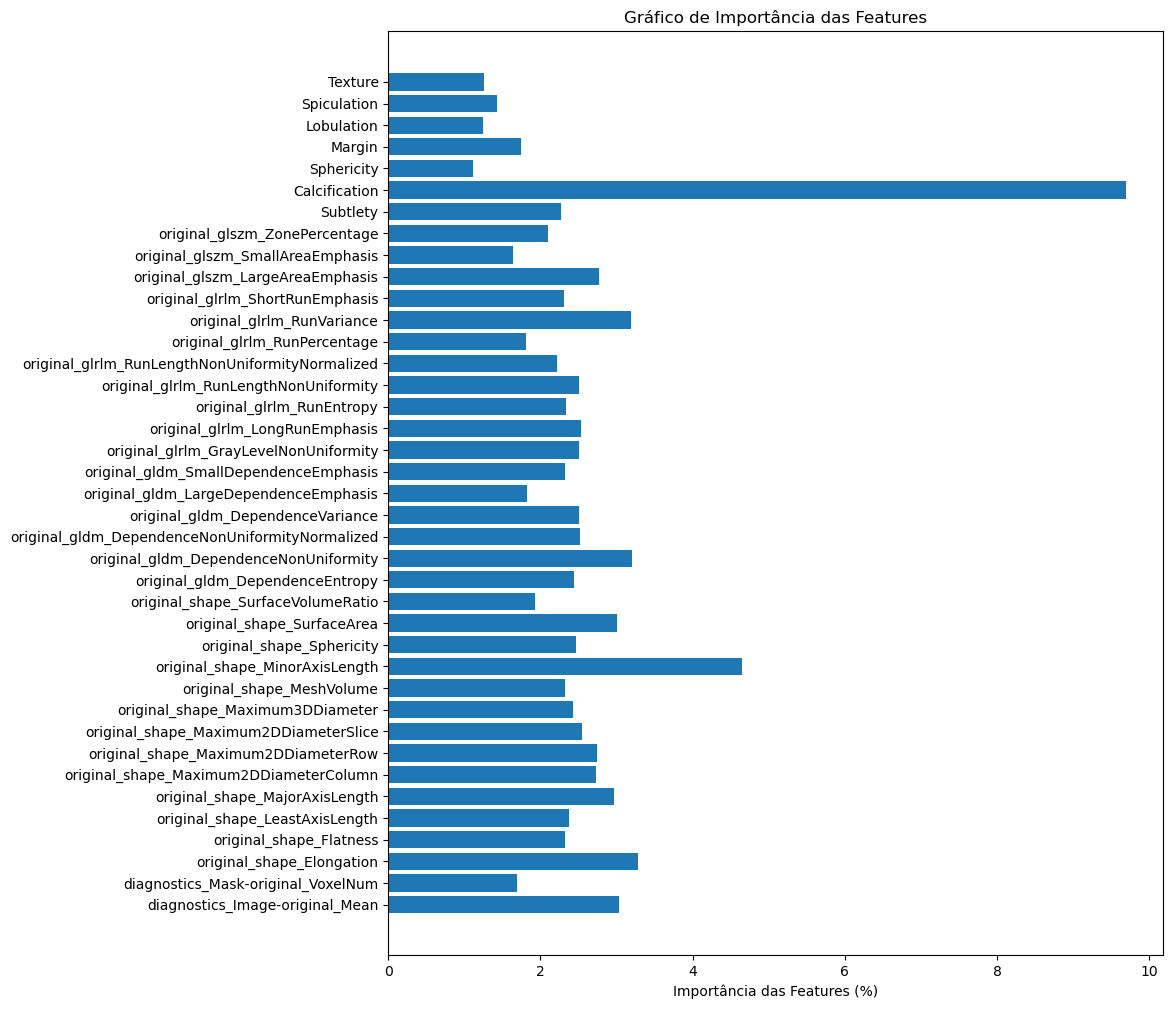

In [73]:
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']

feature_names=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) # stratify=y para retirar
# a mesma porporção de dados a cada classe


model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


importances = model.feature_importances_
total_importance = sum(importances)  # Calcula a importância total

# Calcula a importância de cada feature como porcentagem do total
importances_percent = [(importance / total_importance) * 100 for importance in importances]


#selecionar os que tiverem porcentagem maior que 2
selected_features = [feature_names[i] for i, importance in enumerate(importances_percent) if importance > 2]

plt.figure(figsize=(10, 12))
plt.barh(range(len(importances_percent)), importances_percent)
plt.yticks(range(len(importances_percent)), feature_names)
plt.xlabel('Importância das Features (%)')
plt.title('Gráfico de Importância das Features')
plt.show()

In [74]:
#features selecionadas
selected_features

['diagnostics_Image-original_Mean',
 'original_shape_Elongation',
 'original_shape_Flatness',
 'original_shape_LeastAxisLength',
 'original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Maximum3DDiameter',
 'original_shape_MeshVolume',
 'original_shape_MinorAxisLength',
 'original_shape_Sphericity',
 'original_shape_SurfaceArea',
 'original_gldm_DependenceEntropy',
 'original_gldm_DependenceNonUniformity',
 'original_gldm_DependenceNonUniformityNormalized',
 'original_gldm_DependenceVariance',
 'original_gldm_SmallDependenceEmphasis',
 'original_glrlm_GrayLevelNonUniformity',
 'original_glrlm_LongRunEmphasis',
 'original_glrlm_RunEntropy',
 'original_glrlm_RunLengthNonUniformity',
 'original_glrlm_RunLengthNonUniformityNormalized',
 'original_glrlm_RunVariance',
 'original_glrlm_ShortRunEmphasis',
 'original_glszm_LargeAreaEmphasis',
 'original_glszm_ZonePercentage',


In [75]:
#juntar as features selecionadas com a classe Malignancy
df = df[selected_features]
df = pd.concat([df,y], axis=1)
df

diagnostics_Image-original_Mean  original_shape_Elongation  \
0                            2.071496                   0.689087   
1                            2.269942                   0.664228   
2                           -0.702286                   0.925235   
3                            2.854375                   1.521428   
4                           -0.234721                   0.160861   
...                               ...                        ...   
2646                        -0.533097                   0.268197   
2647                         0.033372                  -0.036191   
2648                         0.147193                  -1.497244   
2649                        -0.710680                  -2.348597   
2650                         6.904941                   1.156142   

      original_shape_Flatness  original_shape_LeastAxisLength  \
0                   -0.876616                        0.355241   
1                   -0.898878                        0.254532   
2                   -0.482863                       -0.824239   
3                   -0.889680                        0.624628   
4                    1.227870                        0.907877   
...                       ...                             ...   
2646                -0.004704                        0.051059   
2647                 1.742563                        1.274146   
2648                -1.062352                       -0.536542   
2649                -0.715684                       -0.571334   
2650                -0.574102                        2.204752   

      original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                           1.559701                                1.311364   
1                           1.429071                                1.991044   
2                          -0.811449                               -0.731450   
3                           2.089517                                2.788788   
4                           0.001000                                0.348196   
...                              ...                                     ...   
2646                       -0.034016                                0.040096   
2647                        0.013902                                0.223279   
2648                        0.187213                               -0.159515   
2649                       -0.289248                               -0.586339   
2650                        3.660725                                4.147592   

      original_shape_Maximum2DDiameterRow  \
0                                2.596663   
1                                1.772262   
2                               -0.781403   
3                                3.062683   
4                                0.025532   
...                                   ...   
2646                            -0.257332   
2647                             0.043666   
2648                             0.100257   
2649                            -0.689893   
2650                             3.749458   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                  1.561344                          2.501735   
1                                  1.220586                          1.520012   
2                                 -0.830038                         -0.805375   
3                                  2.617145                          3.232613   
4                                 -0.035705                          0.065371   
...                                     ...                               ...   
2646                               0.180173                         -0.024836   
2647                               0.033804                          0.025640   
2648                              -0.021525                          0.089295   
2649                              -0.542084                         -0.418521   
2650           

In [76]:
#correlação dos dados
df.corr()

diagnostics_Image-original_Mean  \
diagnostics_Image-original_Mean                                         1.000000   
original_shape_Elongation                                               0.051320   
original_shape_Flatness                                                -0.178058   
original_shape_LeastAxisLength                                          0.588722   
original_shape_MajorAxisLength                                          0.812347   
original_shape_Maximum2DDiameterColumn                                  0.829473   
original_shape_Maximum2DDiameterRow                                     0.846017   
original_shape_Maximum2DDiameterSlice                                   0.824441   
original_shape_Maximum3DDiameter                                        0.813576   
original_shape_MeshVolume                                               0.692234   
original_shape_MinorAxisLength                                          0.899628   
original_shape_Sphericity                                              -0.483606   
original_shape_SurfaceArea                                              0.748511   
original_gldm_DependenceEntropy                                        -0.394346   
original_gldm_DependenceNonUniformity                                   0.594877   
original_gldm_DependenceNonUniformityNormalized                         0.678410   
original_gldm_DependenceVariance                                        0.246556   
original_gldm_SmallDependenceEmphasis                                  -0.348827   
original_glrlm_GrayLevelNonUniformity                                   0.751562   
original_glrlm_LongRunEmphasis                                          0.902275   
original_glrlm_RunEntropy                                               0.729706   
original_glrlm_RunLengthNonUniformity                                   0.752127   
original_glrlm_RunLengthNonUniformityNormalized                        -0.588063   
original_glrlm_RunVariance                                              0.796313   
original_glrlm_ShortRunEmphasis                                        -0.523110   
original_glszm_LargeAreaEmphasis                                        0.466679   
original_glszm_ZonePercentage                                          -0.470236   
Subtlety                                                                0.312380   
Calcification                                                           0.105867   
Malignancy                                                              0.472325   

                                                 original_shape_Elongation  \
diagnostics_Image-original_Mean                                   0.051320   
original_shape_Elongation                                         1.000000   
original_shape_Flatness                                           0.313004   
original_shape_LeastAxisLength                                    0.010568   
original_shape_MajorAxisLength                                   -0.250152   
original_shape_Maximum2DDiameterColumn                           -0.091576   
original_shape_Maximum2DDiameterRow                              -0.150492   
original_shape_Maximum2DDiameterSlice                            -0.081155   
original_shape_Maximum3DDiameter                                 -0.187461   
original_shape_MeshVolume                                        -0.021671   
original_shape_MinorAxisLength                                    0.066386   
original_shape_Sphericity                                         0.303387   
original_shape_SurfaceArea                                       -0.064578   
original_gldm_DependenceEntropy                                  -0.062497   
original_gldm_DependenceNonUniformity                             0.007572   
original_gldm_DependenceNonUniformityNormalized                   0.065781   
original_gldm_DependenceVariance                                  0.026512   
original_gldm_SmallDependenceEmphasis   

In [77]:
# media da correlação com a coluna malignancy
cor = df.corr()
med = cor.iloc[-1, :].mean()
med

0.2683488027500226

Apesar da media ser mais baixa existe uma grande quantidade de numeros acima de 0.35 por isso iremos usar esse numero para selecionar as features para o dataframe

In [78]:
corr_matrix = df.corr()
corr_target = corr_matrix['Malignancy']


# Selecione apenas as features com correlação acima da media
selected_features = df.columns[corr_target.abs() > 0.35]

# criar dataset com as features selecionadas
df = df[selected_features]
df

diagnostics_Image-original_Mean  original_shape_LeastAxisLength  \
0                            2.071496                        0.355241   
1                            2.269942                        0.254532   
2                           -0.702286                       -0.824239   
3                            2.854375                        0.624628   
4                           -0.234721                        0.907877   
...                               ...                             ...   
2646                        -0.533097                        0.051059   
2647                         0.033372                        1.274146   
2648                         0.147193                       -0.536542   
2649                        -0.710680                       -0.571334   
2650                         6.904941                        2.204752   

      original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                           1.559701                                1.311364   
1                           1.429071                                1.991044   
2                          -0.811449                               -0.731450   
3                           2.089517                                2.788788   
4                           0.001000                                0.348196   
...                              ...                                     ...   
2646                       -0.034016                                0.040096   
2647                        0.013902                                0.223279   
2648                        0.187213                               -0.159515   
2649                       -0.289248                               -0.586339   
2650                        3.660725                                4.147592   

      original_shape_Maximum2DDiameterRow  \
0                                2.596663   
1                                1.772262   
2                               -0.781403   
3                                3.062683   
4                                0.025532   
...                                   ...   
2646                            -0.257332   
2647                             0.043666   
2648                             0.100257   
2649                            -0.689893   
2650                             3.749458   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                  1.561344                          2.501735   
1                                  1.220586                          1.520012   
2                                 -0.830038                         -0.805375   
3                                  2.617145                          3.232613   
4                                 -0.035705                          0.065371   
...                                     ...                               ...   
2646                               0.180173                         -0.024836   
2647                               0.033804                          0.025640   
2648                              -0.021525                          0.089295   
2649                              -0.542084                         -0.418521   
2650                               3.860821                          3.398428   

      original_shape_MeshVolume  original_shape_MinorAxisLength  \
0                      0.524362                        2.135071   
1                      0.450715                        1.962668   
2                     -0.340115                       -0.718723   
3                      1.337697                        3.335031   
4                     -0.116539                        0.092472   
...                         ...                             ...   
2646                  -0.207168                        0.082494   
2647                  -0.070161                        0.051598   
2648                  -0.270665                    

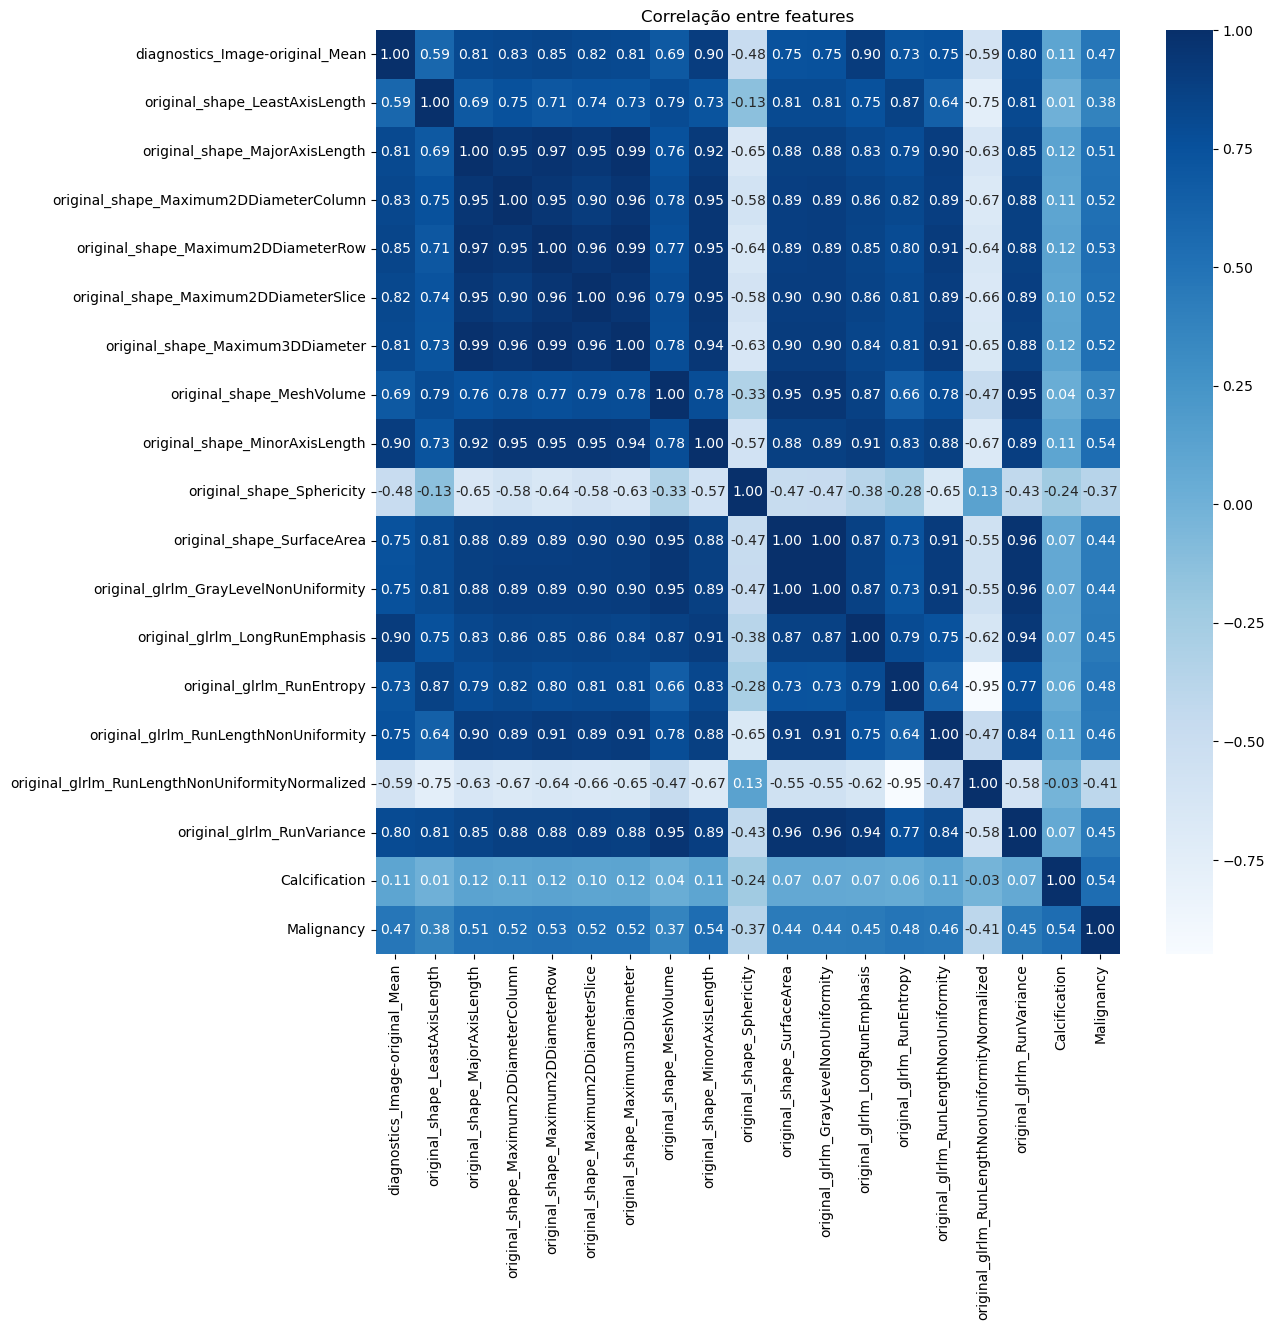

In [79]:
# plot do grafico da correlação das features selecionadas
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre features')
plt.show()

# Outliers

In [80]:
target = 'Malignancy'

# Detectar outliers usando o Intervalo Interquartil
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]


print("Outliers:")
print(len(outliers))

outlier_class_counts = outliers['Malignancy'].value_counts()
print("Contagem de outliers por classe:")
print(outlier_class_counts)

Outliers:
70
Contagem de outliers por classe:
5.0    70
Name: Malignancy, dtype: int64


#### Não vamos remover os outliers uma vez que todos dizem respeito à totalidade da classe minoritaria e esta classe é importante para o desenvolvimento do projeto

# Diferentes abordagens

df1 -> dataframe com as 5 classes a serem previstas

df2 -> dataframe com 3 classes a serem previstas, ou seja, valores de Malignancy:    1 e 2 -> Benigno
                                                                                         3 -> Duvidoso
                                                                                     4 e 5 -> Maligno
                                                                                  
df3 -> dataframe com 2 classes a serem previstas, ou seja, valores de Malignancy:     1, 2 -> Benigno
                                                                                  3, 4 e 5 -> Maligno

In [81]:
df1=df.copy()
df2=df.copy()
df3=df.copy()

In [82]:
mapeamento = {
    1.0: 'Benigno',
    2.0: 'Benigno',
    3.0: 'Duvidoso',
    4.0: 'Maligno',
    5.0: 'Maligno'
}

# Aplicar o mapeamento à coluna 'Malignancy'
df2['Malignancy'] = df2['Malignancy'].map(mapeamento)
df2

diagnostics_Image-original_Mean  original_shape_LeastAxisLength  \
0                            2.071496                        0.355241   
1                            2.269942                        0.254532   
2                           -0.702286                       -0.824239   
3                            2.854375                        0.624628   
4                           -0.234721                        0.907877   
...                               ...                             ...   
2646                        -0.533097                        0.051059   
2647                         0.033372                        1.274146   
2648                         0.147193                       -0.536542   
2649                        -0.710680                       -0.571334   
2650                         6.904941                        2.204752   

      original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                           1.559701                                1.311364   
1                           1.429071                                1.991044   
2                          -0.811449                               -0.731450   
3                           2.089517                                2.788788   
4                           0.001000                                0.348196   
...                              ...                                     ...   
2646                       -0.034016                                0.040096   
2647                        0.013902                                0.223279   
2648                        0.187213                               -0.159515   
2649                       -0.289248                               -0.586339   
2650                        3.660725                                4.147592   

      original_shape_Maximum2DDiameterRow  \
0                                2.596663   
1                                1.772262   
2                               -0.781403   
3                                3.062683   
4                                0.025532   
...                                   ...   
2646                            -0.257332   
2647                             0.043666   
2648                             0.100257   
2649                            -0.689893   
2650                             3.749458   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                  1.561344                          2.501735   
1                                  1.220586                          1.520012   
2                                 -0.830038                         -0.805375   
3                                  2.617145                          3.232613   
4                                 -0.035705                          0.065371   
...                                     ...                               ...   
2646                               0.180173                         -0.024836   
2647                               0.033804                          0.025640   
2648                              -0.021525                          0.089295   
2649                              -0.542084                         -0.418521   
2650                               3.860821                          3.398428   

      original_shape_MeshVolume  original_shape_MinorAxisLength  \
0                      0.524362                        2.135071   
1                      0.450715                        1.962668   
2                     -0.340115                       -0.718723   
3                      1.337697                        3.335031   
4                     -0.116539                        0.092472   
...                         ...                             ...   
2646                  -0.207168                        0.082494   
2647                  -0.070161                        0.051598   
2648                  -0.270665                    

In [83]:
mapeamento = {
    1.0: 'Benigno',
    2.0: 'Benigno',
    3.0: 'Maligno',
    4.0: 'Maligno',
    5.0: 'Maligno'
}

# Aplicar o mapeamento à coluna 'Malignancy'
df3['Malignancy'] = df3['Malignancy'].map(mapeamento)
df3

diagnostics_Image-original_Mean  original_shape_LeastAxisLength  \
0                            2.071496                        0.355241   
1                            2.269942                        0.254532   
2                           -0.702286                       -0.824239   
3                            2.854375                        0.624628   
4                           -0.234721                        0.907877   
...                               ...                             ...   
2646                        -0.533097                        0.051059   
2647                         0.033372                        1.274146   
2648                         0.147193                       -0.536542   
2649                        -0.710680                       -0.571334   
2650                         6.904941                        2.204752   

      original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                           1.559701                                1.311364   
1                           1.429071                                1.991044   
2                          -0.811449                               -0.731450   
3                           2.089517                                2.788788   
4                           0.001000                                0.348196   
...                              ...                                     ...   
2646                       -0.034016                                0.040096   
2647                        0.013902                                0.223279   
2648                        0.187213                               -0.159515   
2649                       -0.289248                               -0.586339   
2650                        3.660725                                4.147592   

      original_shape_Maximum2DDiameterRow  \
0                                2.596663   
1                                1.772262   
2                               -0.781403   
3                                3.062683   
4                                0.025532   
...                                   ...   
2646                            -0.257332   
2647                             0.043666   
2648                             0.100257   
2649                            -0.689893   
2650                             3.749458   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                  1.561344                          2.501735   
1                                  1.220586                          1.520012   
2                                 -0.830038                         -0.805375   
3                                  2.617145                          3.232613   
4                                 -0.035705                          0.065371   
...                                     ...                               ...   
2646                               0.180173                         -0.024836   
2647                               0.033804                          0.025640   
2648                              -0.021525                          0.089295   
2649                              -0.542084                         -0.418521   
2650                               3.860821                          3.398428   

      original_shape_MeshVolume  original_shape_MinorAxisLength  \
0                      0.524362                        2.135071   
1                      0.450715                        1.962668   
2                     -0.340115                       -0.718723   
3                      1.337697                        3.335031   
4                     -0.116539                        0.092472   
...                         ...                             ...   
2646                  -0.207168                        0.082494   
2647                  -0.070161                        0.051598   
2648                  -0.270665                    

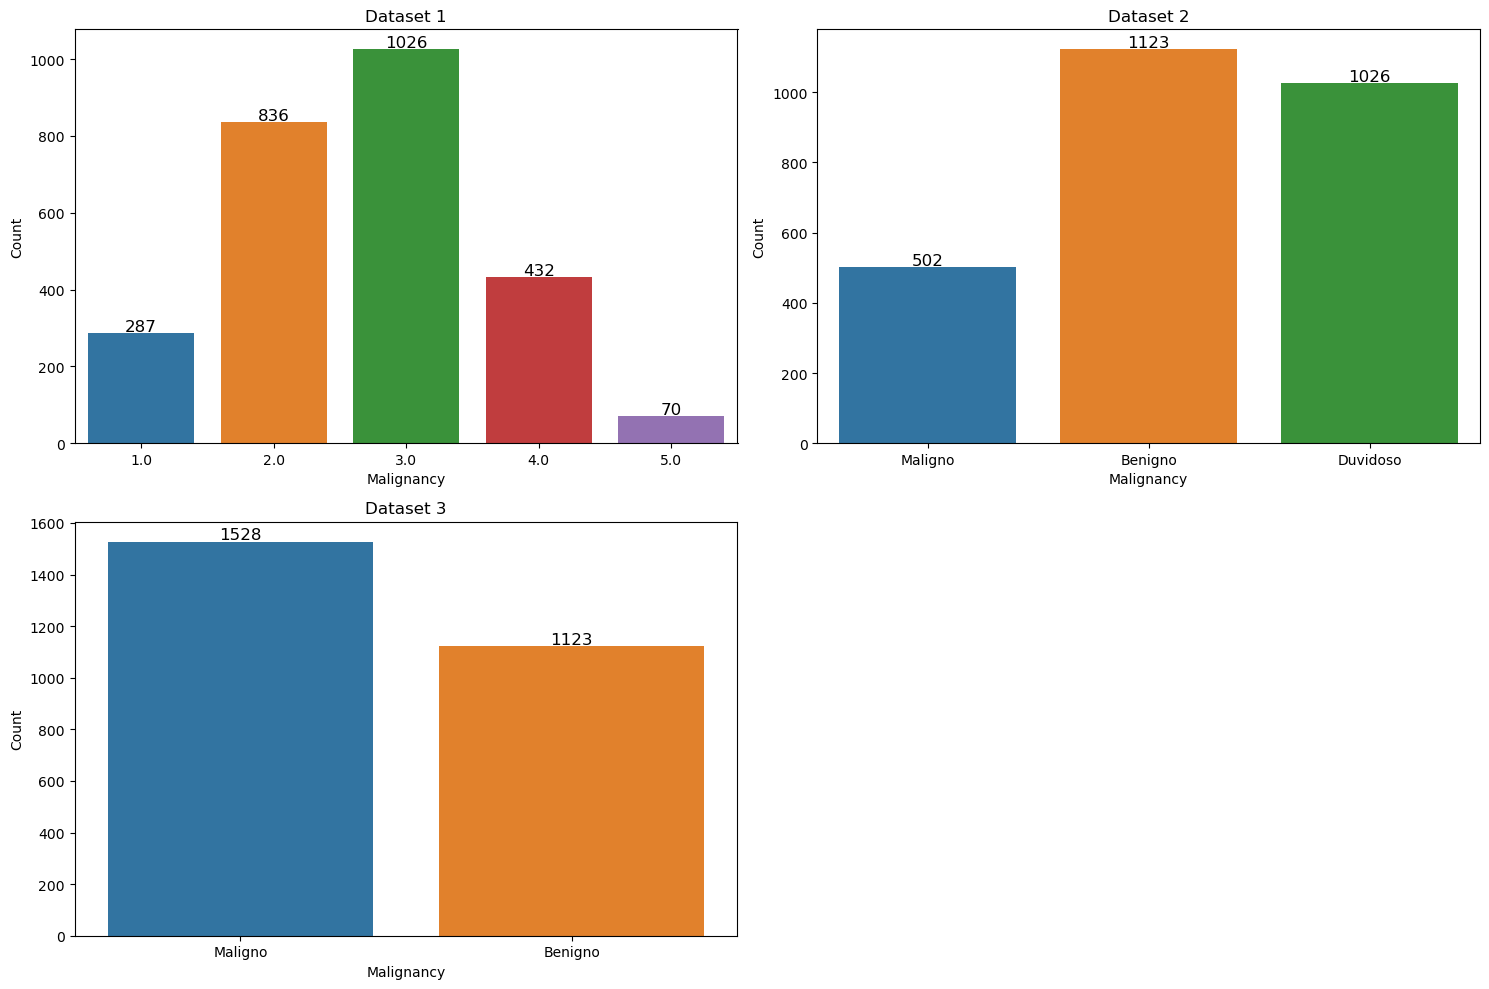

In [84]:
dataframes = [df1, df2, df3]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3']

num_plots = len(dataframes)

# Calculo do número de linhas necessárias com base no número de gráficos
num_rows = (num_plots + 1) // 2

# Criação de uma figura com uma matriz de subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten a matriz de subplots para facilitar o acesso
axes = axes.flatten()

# Plot de cada dataframe em um subplot
for i in range(num_plots):
    ax = axes[i]
    sns.countplot(data=dataframes[i], x='Malignancy', ax=ax)
    ax.set_xlabel('Malignancy')
    ax.set_ylabel('Count')
    ax.set_title(titles[i])
    
    # Adicionar os números em cima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
        
# Oculta subplots vazios
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Ajustar o layout
plt.tight_layout()
plt.show()

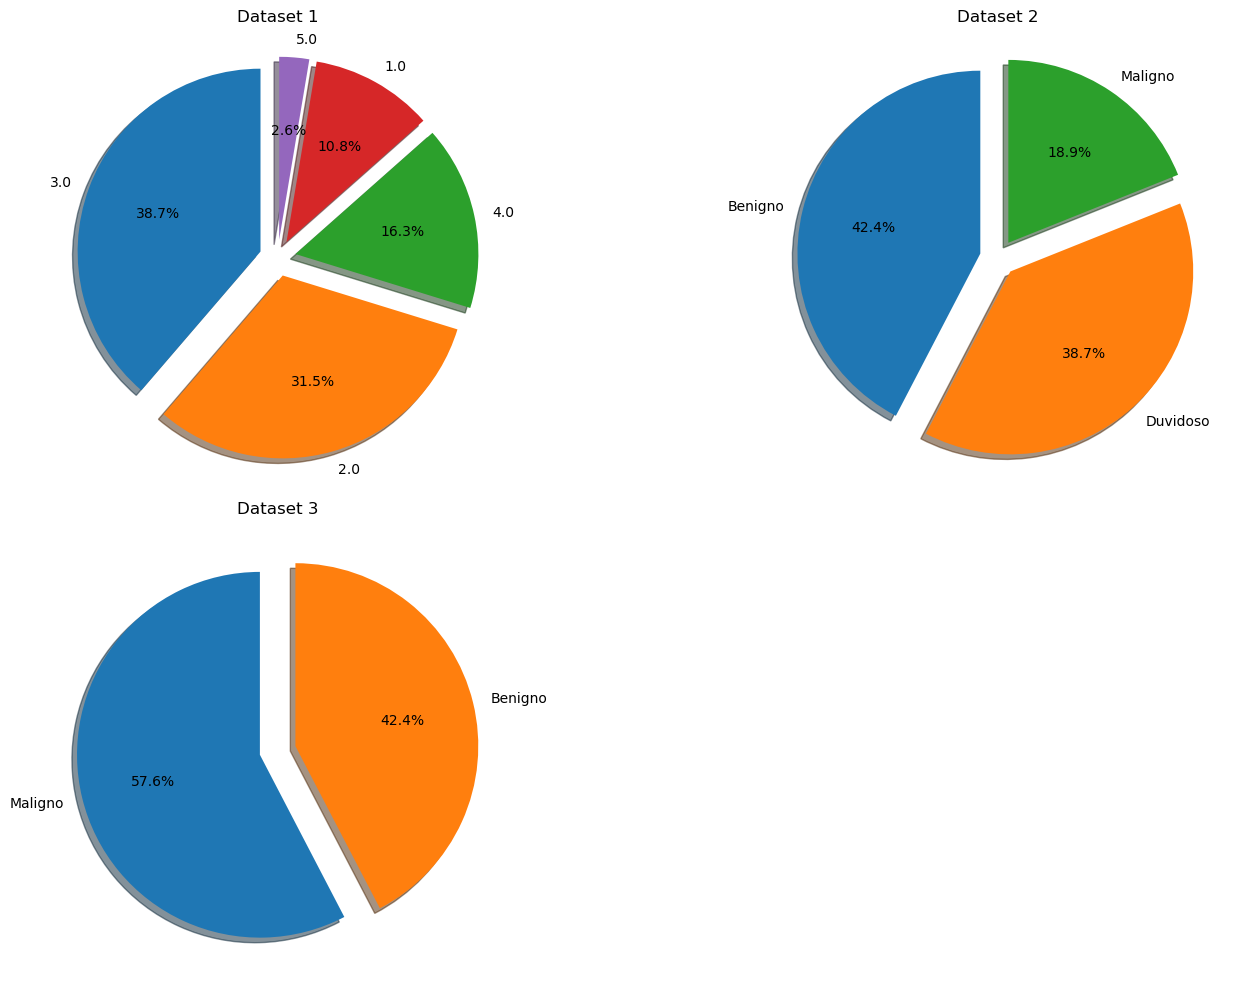

In [85]:
import matplotlib.pyplot as plt
import numpy as np

dataframes = [df1, df2, df3]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3']
num_plots = len(dataframes)

# Calculo do número de linhas necessárias com base no número de gráficos
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))


# Plot de cada dataframe em um subplot
for i in range(num_plots):
    ax = axes[i // 2, i % 2]
    data = dataframes[i]['Malignancy']

    # Contagem dos valores únicos
    value_counts = data.value_counts()
    labels = value_counts.index.tolist()
    sizes = value_counts.values

    # Remover os rótulos e tamanhos quando forem 0,0%
    non_zero_labels = []
    non_zero_sizes = []
    non_zero_explode = []
    
    for label, size in zip(labels, sizes):
        if size > 0:
            non_zero_labels.append(label)
            non_zero_sizes.append(size)
            non_zero_explode.append(0.1)
    
    ax.pie(non_zero_sizes, labels=non_zero_labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=non_zero_explode)
    ax.set_title(titles[i])
    
# Oculta subplots vazios 
for i in range(num_plots, num_rows * 2):
    fig.delaxes(axes[i // 2, i % 2])


# Ajustar o layout
plt.tight_layout()
plt.show()



# Divisão dos dataframes

In [86]:
#df1
X = df1.drop('Malignancy', axis=1)
y = df1['Malignancy']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#df2

X = df2.drop('Malignancy', axis=1)
y = df2['Malignancy']

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#df3

X = df3.drop('Malignancy', axis=1)
y = df3['Malignancy']

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

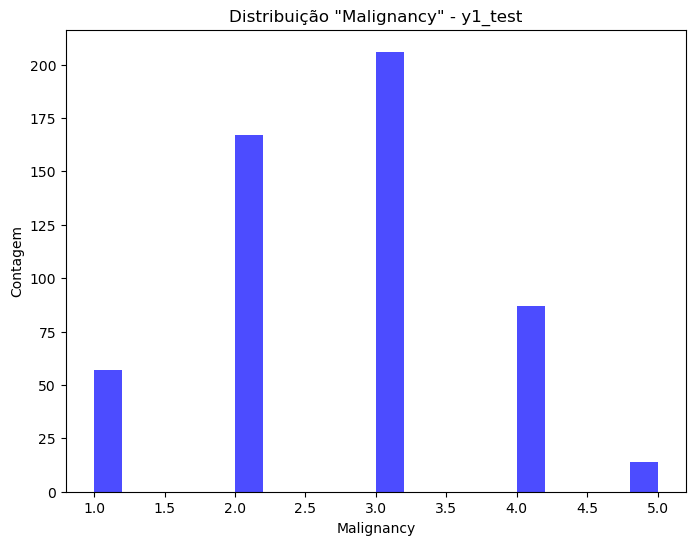

Quantidade de dados para y1_test:
 3.0    206
2.0    167
4.0     87
1.0     57
5.0     14
Name: Malignancy, dtype: int64


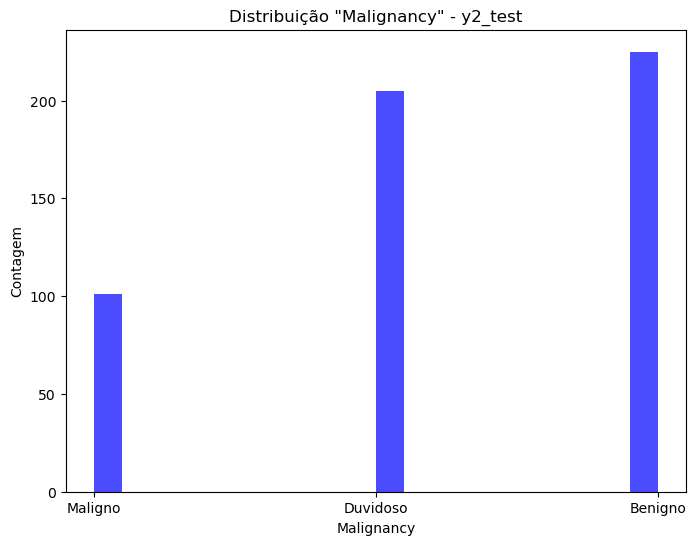

Quantidade de dados para y2_test:
 Benigno     225
Duvidoso    205
Maligno     101
Name: Malignancy, dtype: int64


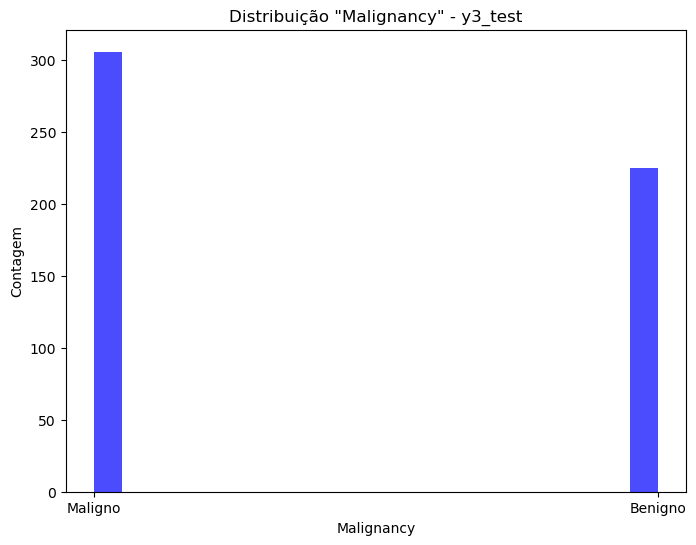

Quantidade de dados para y3_test:
 Maligno    306
Benigno    225
Name: Malignancy, dtype: int64


In [87]:
y_tests = [y1_test, y2_test, y3_test]

#distribuição dos dados pelas classes nos y_test, para verificar se o stratify=y separava a mesma proporçao de dados
#de cada classe

for i, y_test in enumerate(y_tests):
    plt.figure(figsize=(8, 6))
    plt.hist(y_test, bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribuição "Malignancy" - y{i+1}_test')
    plt.xlabel('Malignancy')
    plt.ylabel('Contagem')
    plt.show()

    # Obtenha a quantidade de dados para a série atual
    value_counts = y_test.value_counts()
    print(f"Quantidade de dados para y{i+1}_test:\n", value_counts)

#### podemos verificar que cada y_test contem a mesma proporção de dados de cada classe presente na coluna 'Malignancy'

# Balanceamento dos dados

Vamos testar diferentes tecnicas, oversampling e undersampling.
Decidimos escolher estas tecnicas pois já nos eram familiares de nome e achamos que seria os mais indicados para o problema devido a pesquisa que foi feita.

## Oversampling

Para esta tecnica vamos usar 2 maneiras diferentes de oversampling que vão estar identificados por 

X3r_train, X2r_train, X1r_train, y3r_train, y2r_train, y1r_train -> oversampling random 
    
X3s_train, X2s_train, X1s_train, y3s_train, y2s_train, y1s_train -> smote      


### Random

In [88]:
def over_random(X,y):
    # Criar uma instância do oversampler
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

    # Aplicar oversampling aos seus dados
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    

    return X_resampled, y_resampled


In [89]:
#executar o oversampling random
X3r_train,y3r_train=over_random(X3_train,y3_train)
X2r_train,y2r_train=over_random(X2_train,y2_train)
X1r_train,y1r_train=over_random(X1_train,y1_train)

In [90]:
#criar um dataset só com dados de treino
df3_r = pd.concat([X3r_train,y3r_train], axis=1)
df2_r = pd.concat([X2r_train,y2r_train], axis=1)
df1_r = pd.concat([X1r_train,y1r_train], axis=1)

df1_r, df2_r, df3_r dataframe de treino do oversampling random

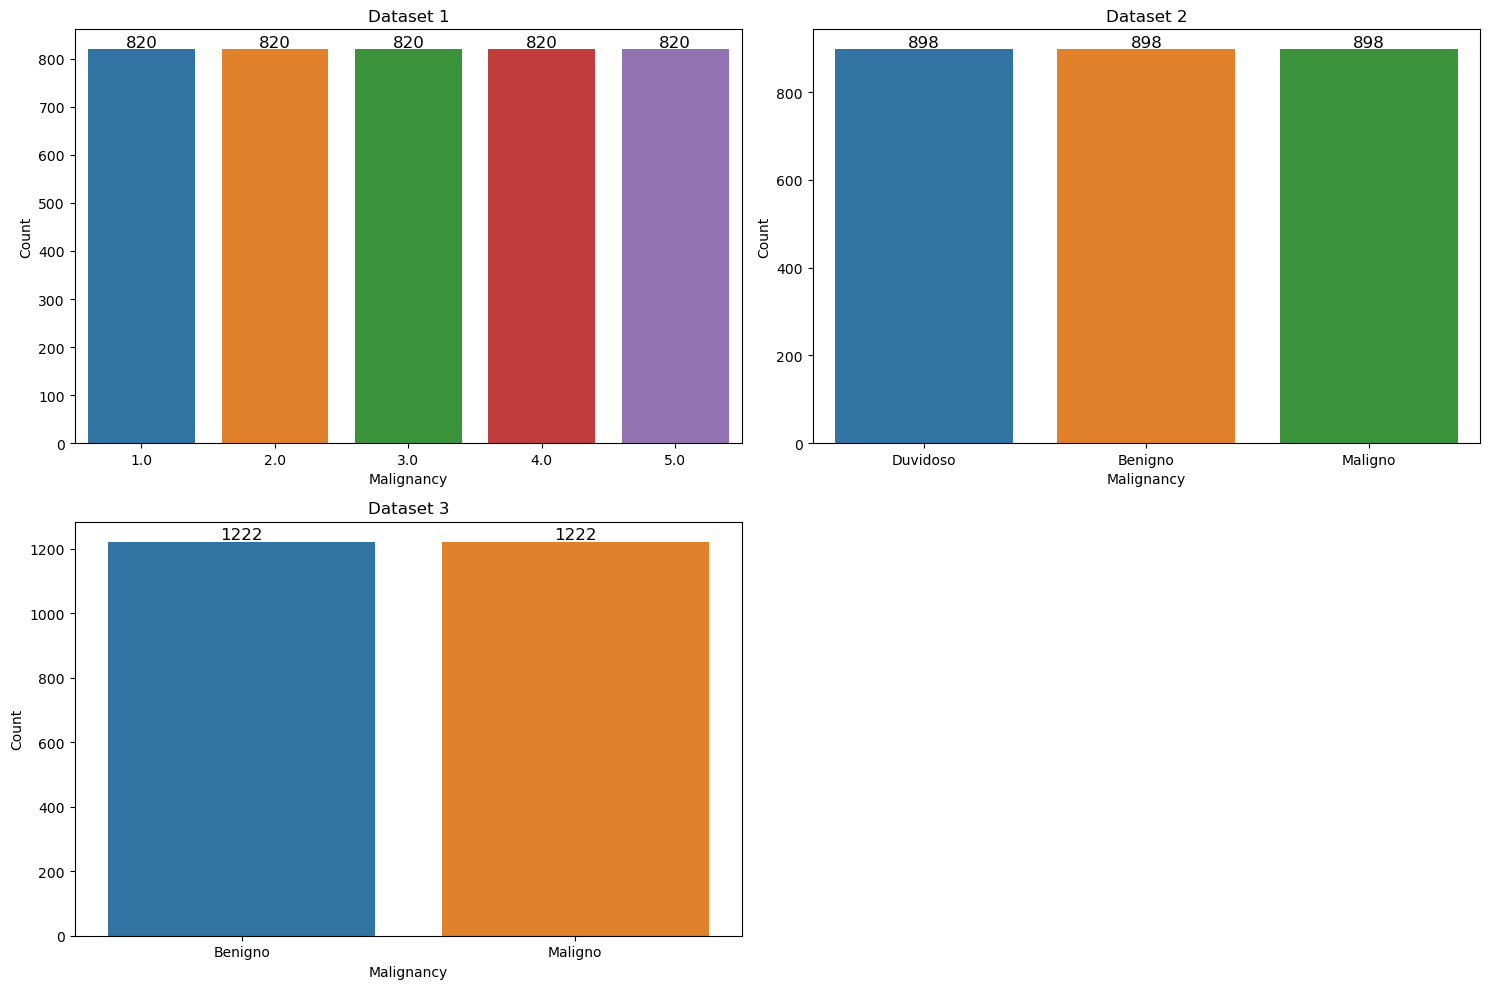

In [91]:
# Plot de graficos para verificar se houve oversampling
dataframes = [df1_r, df2_r, df3_r]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3']

num_plots = len(dataframes)

# Calcular o número de linhas necessárias com base no número de gráficos
num_rows = (num_plots + 1) // 2

# Criar uma figura com uma matriz de subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten a matriz de subplots para facilitar o acesso
axes = axes.flatten()

# Plot de cada dataframe em um subplot
for i in range(num_plots):
    ax = axes[i]
    sns.countplot(data=dataframes[i], x='Malignancy', ax=ax)
    ax.set_xlabel('Malignancy')
    ax.set_ylabel('Count')
    ax.set_title(titles[i])
    
    # Adicionar números em cima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
        
# Oculta subplots vazios
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Ajustar o layout
plt.tight_layout()
plt.show()


### Smote

In [92]:
def over_smote(X,y):
    # Criar uma instância do SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # Você pode ajustar 'sampling_strategy' se desejar

    # Aplicar o SMOTE aos seus dados
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled

In [93]:
# executar o oversampling com smote
X3s_train,y3s_train=over_smote(X3_train,y3_train)
X2s_train,y2s_train=over_smote(X2_train,y2_train)
X1s_train,y1s_train=over_smote(X1_train,y1_train)

In [94]:
#criar um dataset só com dados de treino
df3_s = pd.concat([X3s_train,y3s_train], axis=1)
df2_s = pd.concat([X2s_train,y2s_train], axis=1)
df1_s = pd.concat([X1s_train,y1s_train], axis=1)

df1_s, df2_s e df3_s dataframe de treino utilizando smote

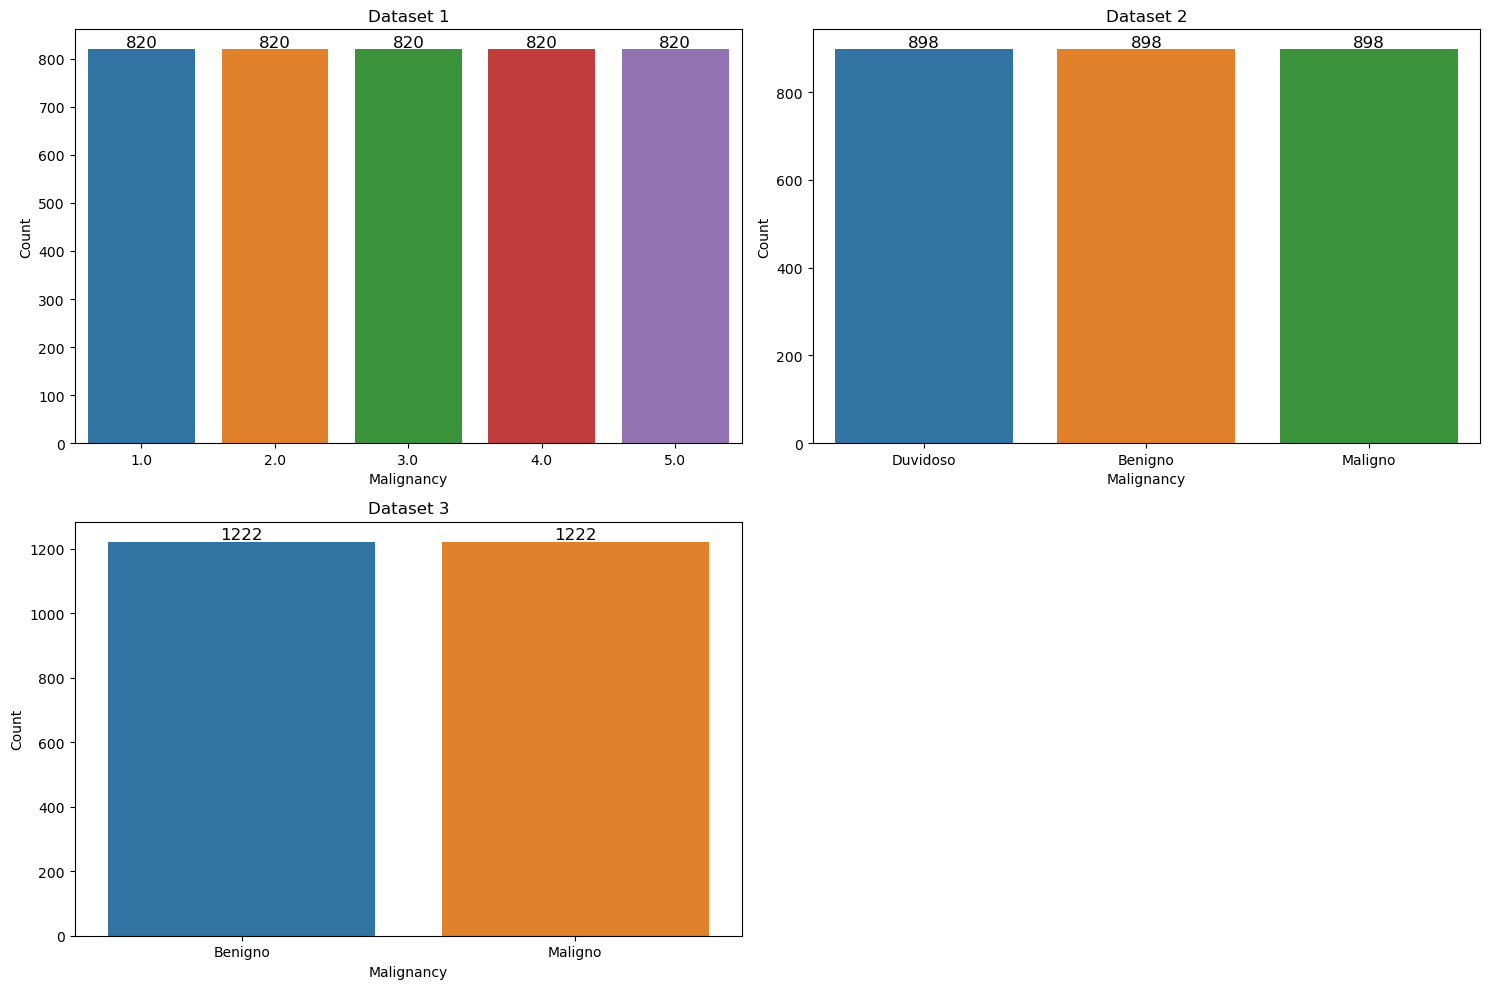

In [95]:
# Plot de graficos para verificar se houve oversampling utilizando o smote
dataframes = [df1_s, df2_s, df3_s]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3']

num_plots = len(dataframes)

# Calcular o número de linhas necessárias com base no número de gráficos
num_rows = (num_plots + 1) // 2

# Criar uma figura com uma matriz de subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten a matriz de subplots para facilitar o acesso
axes = axes.flatten()

# Plot de cada dataframe em um subplot
for i in range(num_plots):
    ax = axes[i]
    sns.countplot(data=dataframes[i], x='Malignancy', ax=ax)
    ax.set_xlabel('Malignancy')
    ax.set_ylabel('Count')
    ax.set_title(titles[i])
    
    # Adicionar números em cima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Oculta subplots vazios
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])        
        
# Ajustar o layout
plt.tight_layout()
plt.show()


## Undersampling

Para esta tecnica vamos usar o random identificado como:

X3ru_train, X2ru_train, X1ru_train, y3ru_train, y2ru_train, y1ru_train -> undersampling random      


### Random

In [96]:
def under_random(X,y):


    # Criar uma instância do oversampler
    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # Você pode ajustar 'sampling_strategy' se desejar


    # Aplicar oversampling aos seus dados
    X_resampled, y_resampled = undersampler.fit_resample(X, y)



    return X_resampled, y_resampled


In [97]:
#executar o undersampling
X3ru_train,y3ru_train=under_random(X3_train,y3_train)
X2ru_train,y2ru_train=under_random(X2_train,y2_train)
X1ru_train,y1ru_train=under_random(X1_train,y1_train)

In [98]:
#criar um dataset só com dados de treino
df3_ru = pd.concat([X3ru_train,y3ru_train], axis=1)
df2_ru = pd.concat([X2ru_train,y2ru_train], axis=1)
df1_ru = pd.concat([X1ru_train,y1ru_train], axis=1)

df1_ru, df2_ru e df3_ru dataframe de treino usando o undersampling random

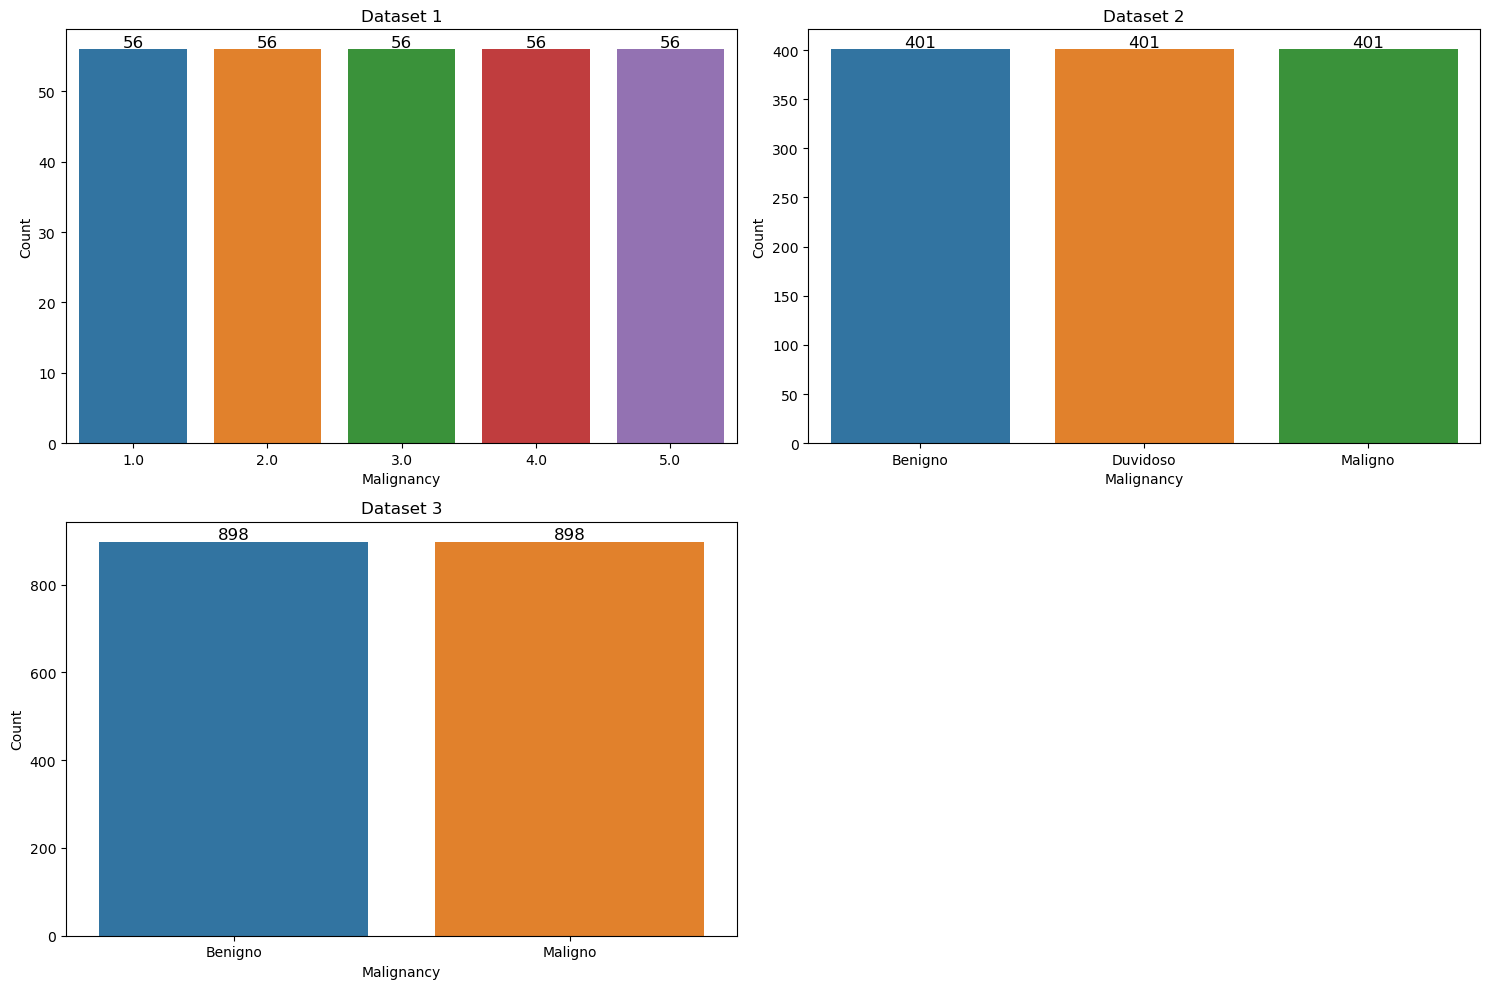

In [99]:
# Plot de graficos para verificar se houve unersampling
dataframes = [df1_ru, df2_ru, df3_ru]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3']

num_plots = len(dataframes)

# Calcular o número de linhas necessárias com base no número de gráficos
num_rows = (num_plots + 1) // 2

# Criar uma figura com uma matriz de subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten a matriz de subplots para facilitar o acesso
axes = axes.flatten()

# Plot de cada dataframe em um subplot
for i in range(num_plots):
    ax = axes[i]
    sns.countplot(data=dataframes[i], x='Malignancy', ax=ax)
    ax.set_xlabel('Malignancy')
    ax.set_ylabel('Count')
    ax.set_title(titles[i])
    
    # Adicionar números em cima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Oculta subplots vazios
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])
        
# Ajustar o layout
plt.tight_layout()
plt.show()

# Treino e avaliação do modelo

In [100]:
#escolha dos parametros (utilizado apenas para a Logistic Regression por se procurar apenas 2 parametros)
# por só se procurar 2 parametros é possivel fazer o plot da grid search

def best_params(X_train,X_test,y_train,y_test, param_grid,model):
    
    #desativar os aviso
    warnings.filterwarnings("ignore", category=UserWarning)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")  # Ignora os avisos durante a pesquisa 
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

    # Obtenha os resultados da pesquisa 
    results = pd.DataFrame(grid_search.cv_results_)

    # Crie uma matriz de calor com os resultados dos melhores hiperparâmetros
    heatmap_data = results.pivot_table(index='param_max_iter', columns='param_C', values='mean_test_score')
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f")
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('max_iter (Max Iterations)')
    plt.title('Grid Search Results')
    plt.show()

    best = grid_search.best_params_
    print("Melhores hiperparâmetros encontrados:")
    print(best)
    
    # Ativação de avisos novamente
    warnings.filterwarnings("default", category=UserWarning)
    
    return best
    


In [101]:
#Procura dos melhores parametros para os outros modelos
def best_params_3(X_train,X_test,y_train,y_test, param_grid, model, cv=5):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")  # Ignora os avisos durante a pesquisa em grade

        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

        # tenta procurar os paramtros se não conseguir envia um aviso
        try:
            grid_search.fit(X_train, y_train)
        except Exception as e:
            print(f"Erro ao ajustar o modelo: {str(e)}")
            return
        
    # melhores parametros
    best = grid_search.best_params_
    print("Melhores hiperparâmetros encontrados:")
    print(best)
    
    return best


## Logistic Regresion

In [102]:
def logistic_regression(X_train,X_test,y_train,y_test, C, max_iter,xt,nome):
    # Criação do modelo
    model = LogisticRegression(C=C, max_iter=max_iter)

    # Treinar o modelo 
    model.fit(X_train, y_train)

    # previsões nos dados de teste
    y_pred = model.predict(X_test)

    # Avaliação do desempenho do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy do modelo: {accuracy:.3f}')

    # matriz de confusão para ver como os dados foram previstos
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xt, yticklabels=xt)
    plt.xlabel('Verdadeiro')
    plt.ylabel('Previsto')
    plt.title('Matriz de Confusão '+nome)
    plt.show()
    
    return accuracy


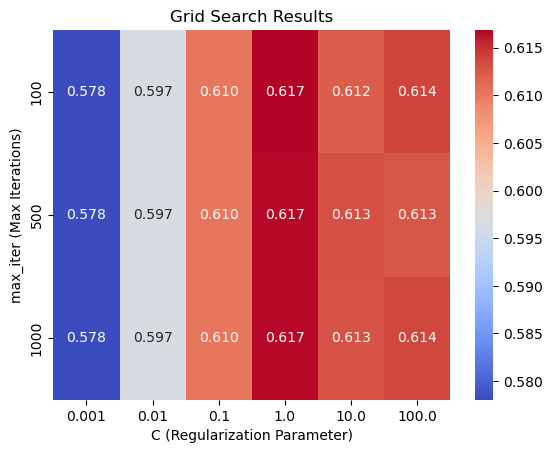

Melhores hiperparâmetros encontrados:
{'C': 1, 'max_iter': 100}
Accuracy do modelo: 0.557


C:\Users\Hp\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


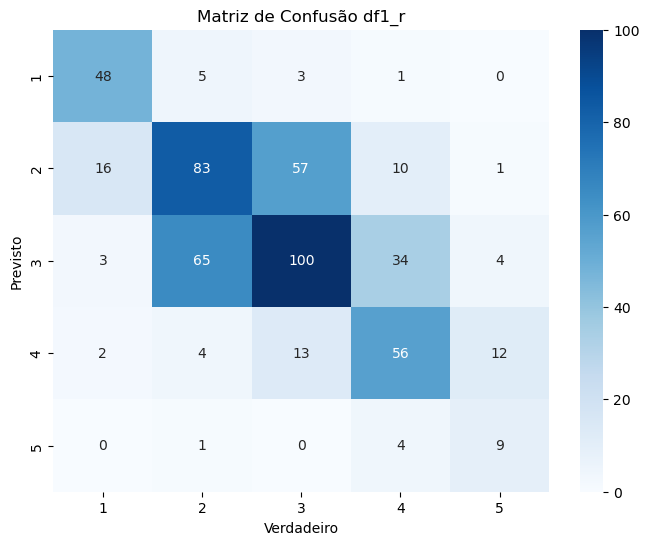

Accuracy do modelo: 0.557


C:\Users\Hp\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


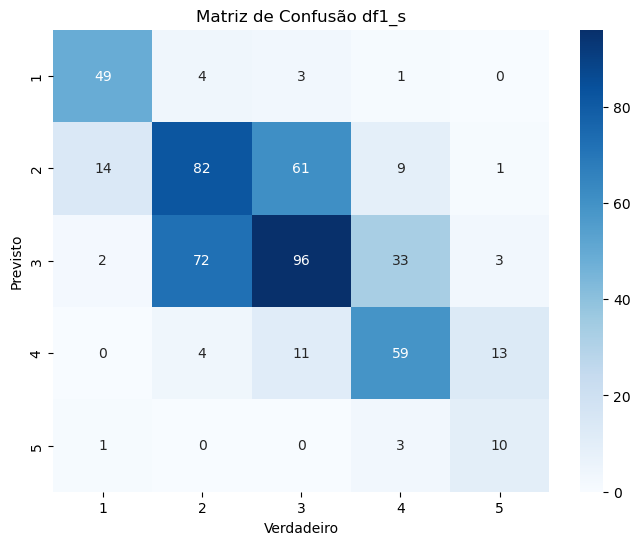

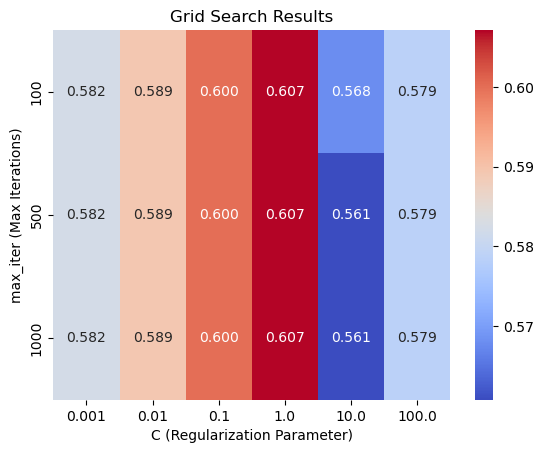

Melhores hiperparâmetros encontrados:
{'C': 1, 'max_iter': 100}
Accuracy do modelo: 0.563


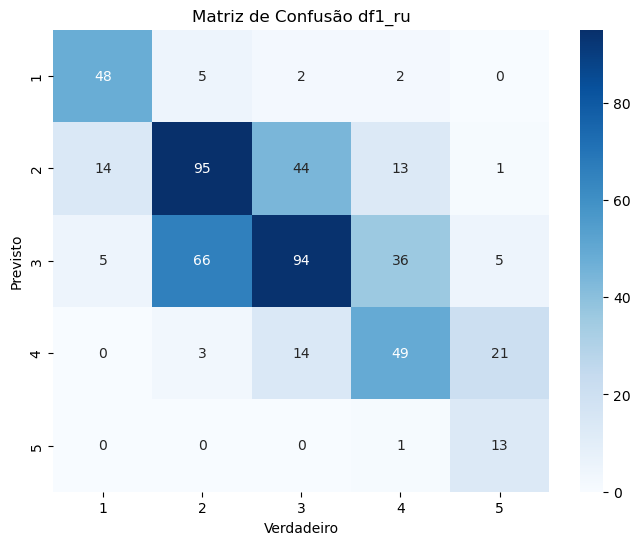

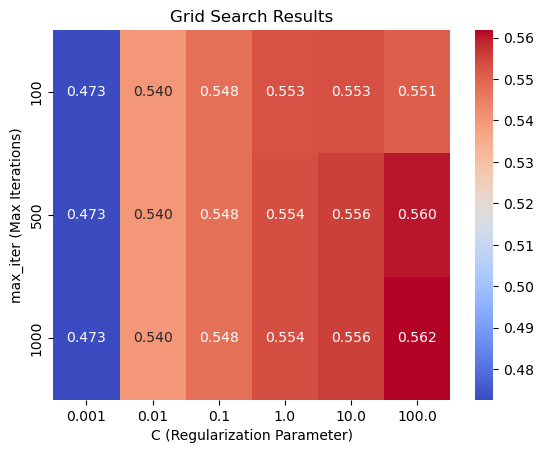

Melhores hiperparâmetros encontrados:
{'C': 100, 'max_iter': 1000}
Accuracy do modelo: 0.606


C:\Users\Hp\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


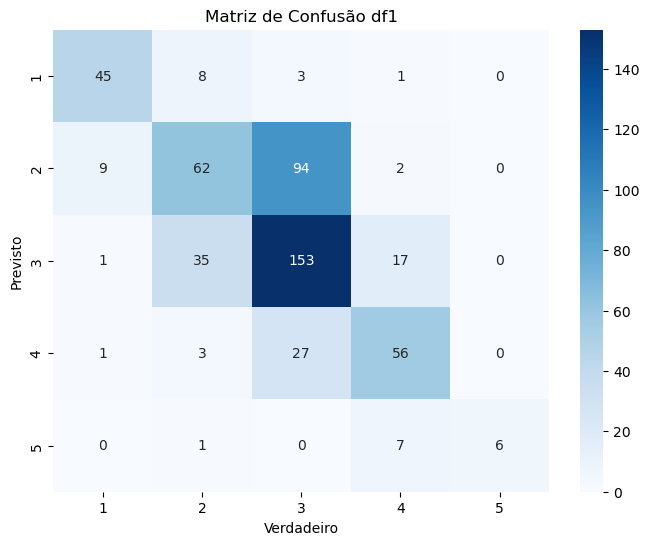

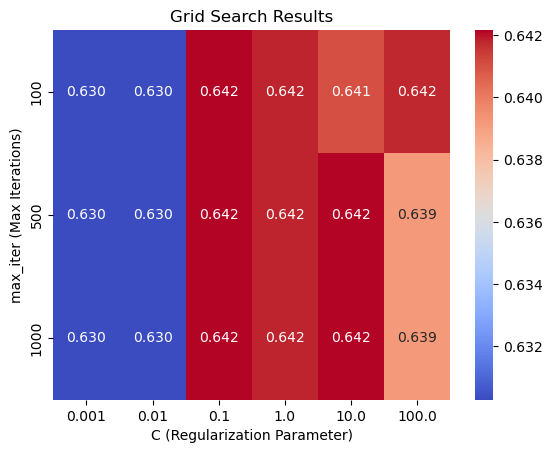

Melhores hiperparâmetros encontrados:
{'C': 10, 'max_iter': 500}
Accuracy do modelo: 0.629


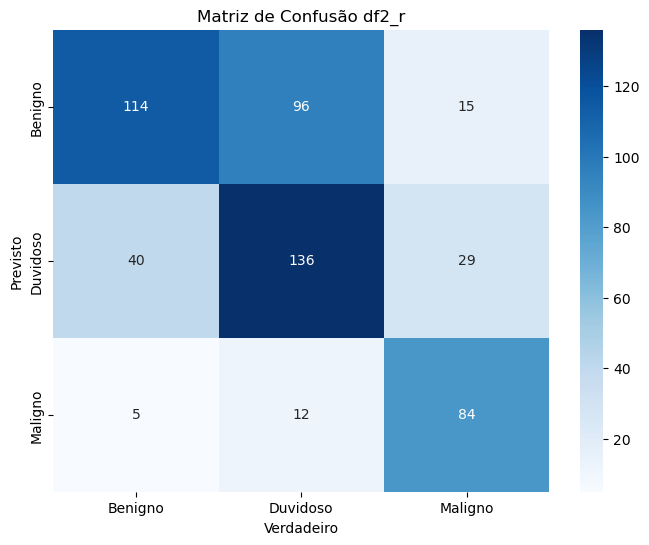

Accuracy do modelo: 0.629


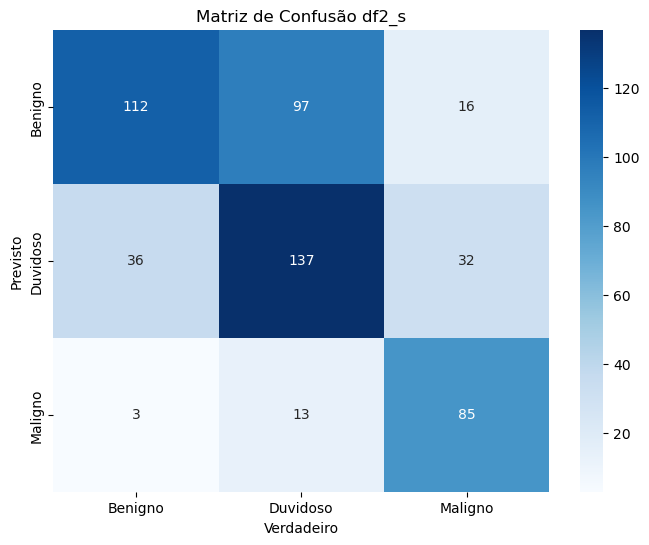

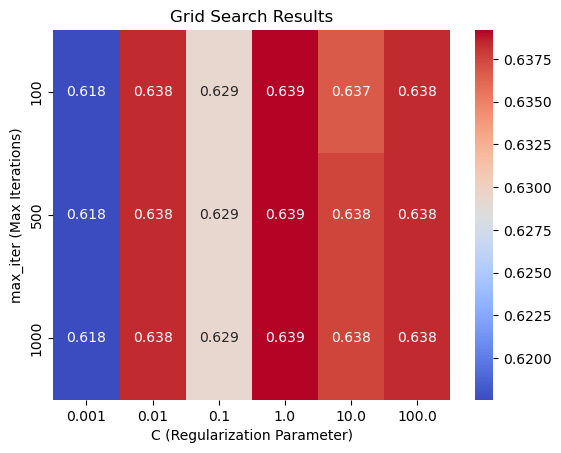

Melhores hiperparâmetros encontrados:
{'C': 1, 'max_iter': 100}
Accuracy do modelo: 0.623


C:\Users\Hp\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


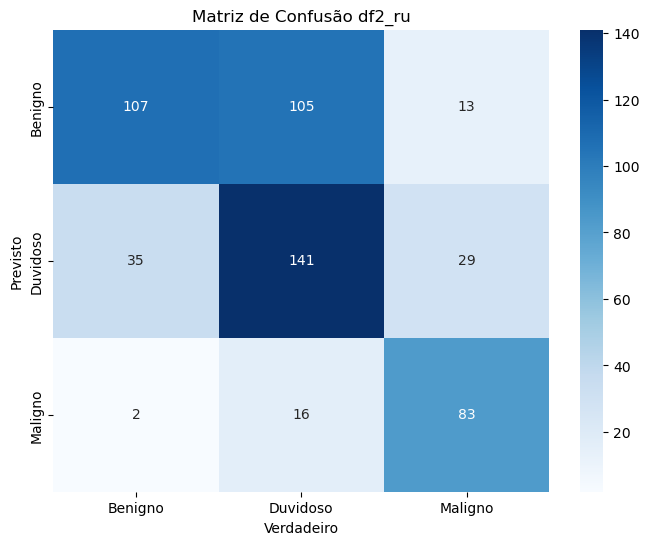

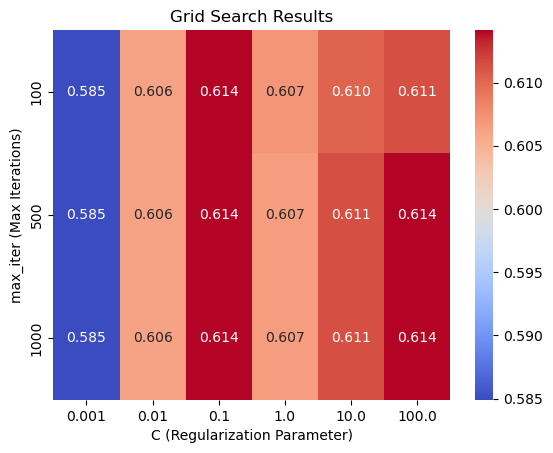

Melhores hiperparâmetros encontrados:
{'C': 0.1, 'max_iter': 100}
Accuracy do modelo: 0.642


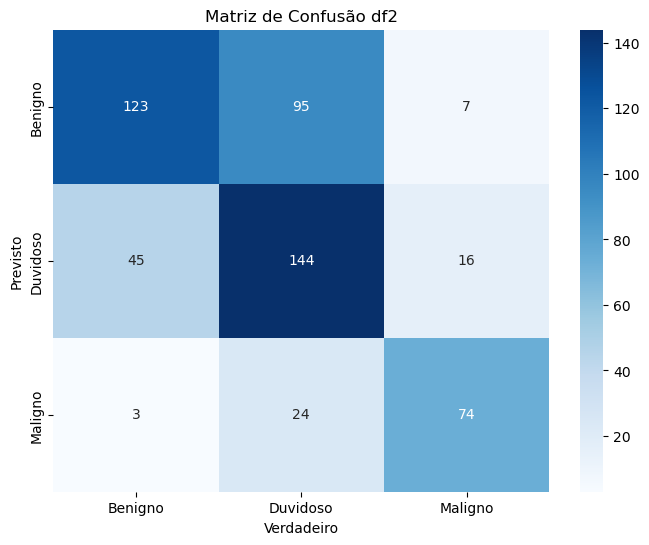

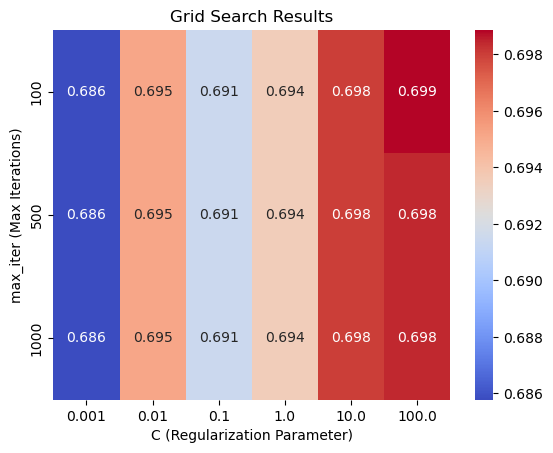

Melhores hiperparâmetros encontrados:
{'C': 100, 'max_iter': 100}
Accuracy do modelo: 0.706


C:\Users\Hp\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


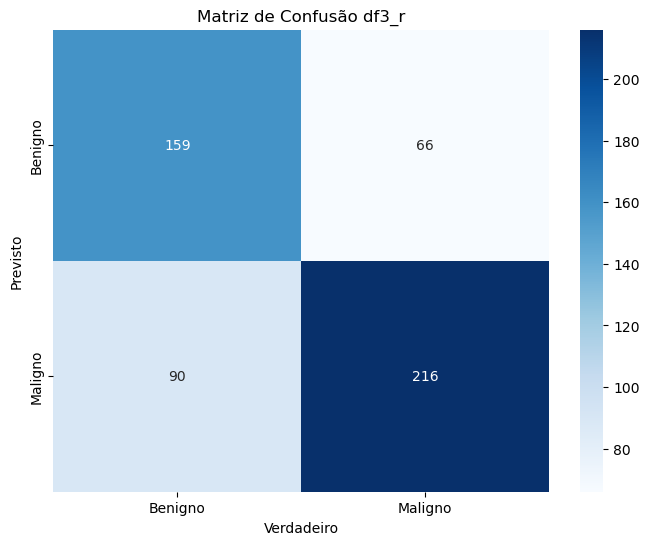

C:\Users\Hp\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy do modelo: 0.710


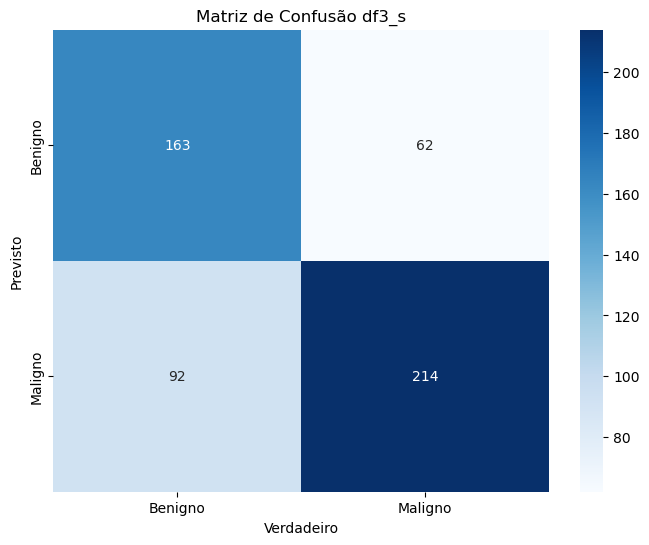

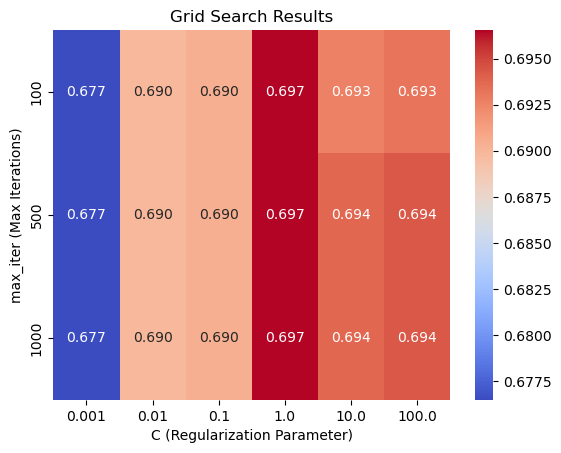

Melhores hiperparâmetros encontrados:
{'C': 1, 'max_iter': 100}
Accuracy do modelo: 0.708


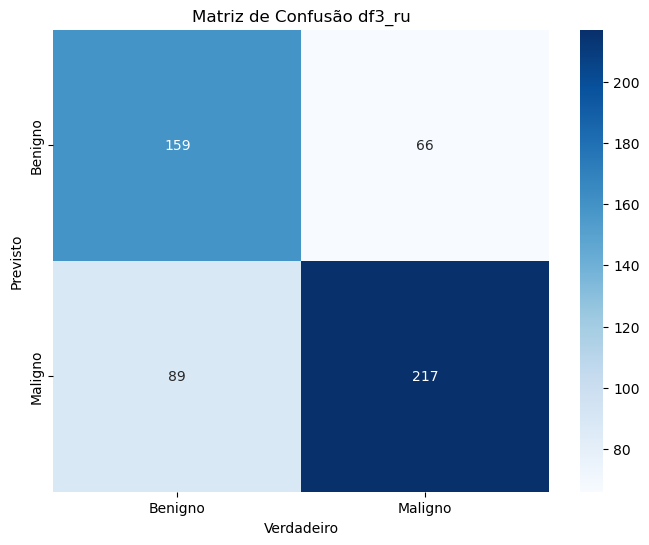

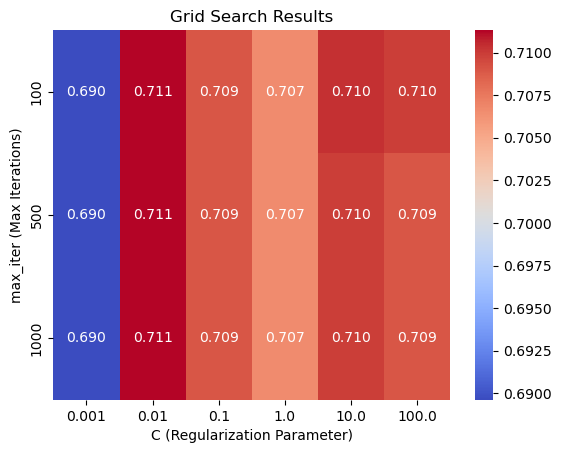

Melhores hiperparâmetros encontrados:
{'C': 0.01, 'max_iter': 100}
Accuracy do modelo: 0.721


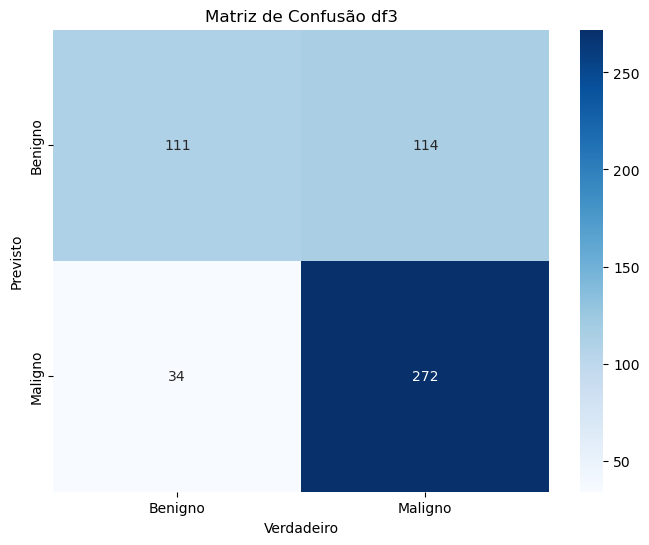

In [103]:
# parametros a procurar sobre a logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'max_iter': [100, 500, 1000]  # Número máximo de iterações
}

#nomes das classes do dataset df1
xt=['1', '2', '3', '4', '5']

#Procura dos parametros e treino do modelo para o dataset df1 e derivados dele
#oversampling
best=best_params(X1s_train,X1_test,y1s_train,y1_test, param_grid,LogisticRegression())
ac1_lr=logistic_regression(X1r_train,X1_test,y1r_train,y1_test,best['C'],best['max_iter'],xt,'df1_r')
ac1_ls=logistic_regression(X1s_train,X1_test,y1s_train,y1_test,best['C'],best['max_iter'],xt,'df1_s')

#undersampling
best=best_params(X1ru_train,X1_test,y1ru_train,y1_test, param_grid,LogisticRegression())
ac1_lru=logistic_regression(X1ru_train,X1_test,y1ru_train,y1_test,best['C'],best['max_iter'],xt,'df1_ru')

#df1
best=best_params(X1_train,X1_test,y1_train,y1_test, param_grid,LogisticRegression())
ac1_l=logistic_regression(X1_train,X1_test,y1_train,y1_test,best['C'],best['max_iter'],xt,'df1')


#nomes das classes do dataset df2
xt=['Benigno','Duvidoso','Maligno']

#Procura dos parametros e treino do modelo para o dataset df2 e derivados dele
#oversampling
best=best_params(X2s_train,X2_test,y2s_train,y2_test, param_grid,LogisticRegression())
ac2_lr=logistic_regression(X2r_train,X2_test,y2r_train,y2_test,best['C'],best['max_iter'],xt,'df2_r')
ac2_ls=logistic_regression(X2s_train,X2_test,y2s_train,y2_test,best['C'],best['max_iter'],xt,'df2_s')

#undersampling
best=best_params(X2ru_train,X2_test,y2ru_train,y2_test, param_grid,LogisticRegression())
ac2_lru=logistic_regression(X2ru_train,X2_test,y2ru_train,y2_test,best['C'],best['max_iter'],xt,'df2_ru')

#df2
best=best_params(X2_train,X2_test,y2_train,y2_test, param_grid,LogisticRegression())
ac2_l=logistic_regression(X2_train,X2_test,y2_train,y2_test,best['C'],best['max_iter'],xt,'df2')

#nomes das classes do dataset df3
xt=['Benigno','Maligno']

#Procura dos parametros e treino do modelo para o dataset df3 e derivados dele
#oversampling
best=best_params(X3s_train,X3_test,y3s_train,y3_test, param_grid,LogisticRegression())
ac3_lr=logistic_regression(X3r_train,X3_test,y3r_train,y3_test,best['C'],best['max_iter'],xt,'df3_r')
ac3_ls=logistic_regression(X3s_train,X3_test,y3s_train,y3_test,best['C'],best['max_iter'],xt,'df3_s')

#undersampling
best=best_params(X3ru_train,X3_test,y3ru_train,y3_test, param_grid,LogisticRegression())
ac3_lru=logistic_regression(X3ru_train,X3_test,y3ru_train,y3_test,best['C'],best['max_iter'],xt,'df3_ru')

#df3
best=best_params(X3_train,X3_test,y3_train,y3_test, param_grid,LogisticRegression())
ac3_l=logistic_regression(X3_train,X3_test,y3_train,y3_test,best['C'],best['max_iter'],xt,'df3')

### Accuracies

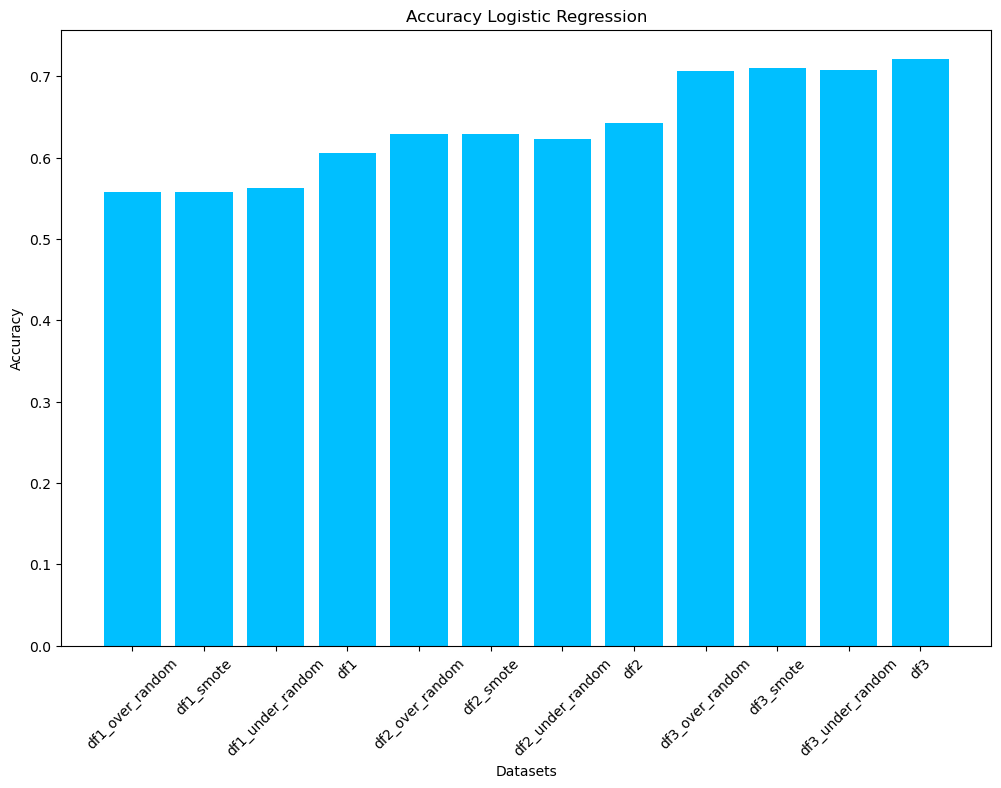

In [104]:
#accuracies para o logistic Regression
accuracies=[ac1_lr,ac1_ls,ac1_lru,ac1_l,ac2_lr,ac2_ls,ac2_lru,ac2_l,ac3_lr,ac3_ls,ac3_lru,ac3_l]

# nome dos datasets utilizados
data_names = ["df1_over_random", "df1_smote", "df1_under_random","df1","df2_over_random", "df2_smote", "df2_under_random","df2","df3_over_random", "df3_smote", "df3_under_random","df3"]  # Substitua pelos nomes reais

# Criação um gráfico de barras das accuracies dos modelos
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico conforme necessário
plt.bar(data_names, accuracies, color='deepskyblue')

# Adicione rótulos aos eixos e um título
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy Logistic Regression')

plt.xticks(rotation=45)


plt.show()

Neste modelo verifcamos uma bom desempenho em geral. Nenhum dos dataset ficou com um desempenho abaixo de 50%. Observamos ainda uma melhor desempenho para o dataset 3 e os seus balenceados como já era previsto

## Rede Neuronal

In [122]:
def neural_network(X_train, X_test, y_train, y_test,loss,flag):
    
    
    unique_classes = np.unique(y_test)
    num_classes = len(unique_classes)
    
    if(flag==1):
        # Encode target classes as one-hot vectors
        y_train_encoded = to_categorical(y_train, num_classes=num_classes)
        y_test_encoded = to_categorical(y_test, num_classes=num_classes)
    
    if (flag==2):
        # Crie um codificador de rótulos (Label Encoder)
        label_encoder = LabelEncoder()
        y_train_integers = label_encoder.fit_transform(y_train)
        y_test_integers = label_encoder.fit_transform(y_test)

        # Em seguida, codifique os rótulos em formato one-hot
        y_train_encoded = to_categorical(y_train_integers, num_classes=num_classes)
        y_test_encoded = to_categorical(y_test_integers, num_classes=num_classes)

    # Rede neural
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    #early_stopping serve para encontrar o melhor numero de epochs (numero de vezes que os dados são passados na rede neuronal)

    model.compile(optimizer='adam', loss=loss, metrics='accuracy')

    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train_encoded, test_size=0.1, random_state=42, stratify=y_train_encoded)
                
    # Treino do modelo
    model.fit(X_train_split, y_train_split, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    best_epochs = early_stopping.stopped_epoch + 1 #numero de epochs usados

    # Avaliação do modelo
    results = model.evaluate(X_test, y_test_encoded, verbose=0)


    print("loss "+str(results[0]))
    print("accuracy "+str(results[1]))
    print(best_epochs)
    return results[1]




In [123]:
y1_test-=1

#Procura dos parametros e treino do modelo para o dataset df1 e derivados dele
#oversampling

acc1_nr=neural_network(X1r_train, X1_test, y1r_train-1, y1_test,'categorical_crossentropy',1)
acc1_ns=neural_network(X1s_train, X1_test, y1s_train-1, y1_test,'categorical_crossentropy',1)

#undersampling

acc1_nru=neural_network(X1ru_train, X1_test, y1ru_train-1, y1_test,'categorical_crossentropy',1)

#df1

acc1_n=neural_network(X1_train, X1_test, y1_train-1, y1_test,'categorical_crossentropy',1)

#Procura dos parametros e treino do modelo para o dataset df2 e derivados dele
#oversampling

acc2_nr=neural_network(X2r_train, X2_test, y2r_train, y2_test,'categorical_crossentropy',2)
acc2_ns=neural_network(X2s_train, X2_test, y2s_train, y2_test,'categorical_crossentropy',2)

#undersampling

acc2_nru=neural_network(X2ru_train, X2_test, y2ru_train, y2_test,'categorical_crossentropy',2)

#df2

acc2_n=neural_network(X2_train, X2_test, y2_train, y2_test,'categorical_crossentropy',2)

#Procura dos parametros e treino do modelo para o dataset df3 e derivados dele
#oversampling

acc3_nr=neural_network(X3r_train, X3_test, y3r_train, y3_test,'binary_crossentropy',2)
acc3_ns=neural_network(X3s_train, X3_test, y3s_train, y3_test,'binary_crossentropy',2)

#undersampling

acc3_nru=neural_network(X3ru_train, X3_test, y3ru_train, y3_test,'binary_crossentropy',2)

#df3

acc3_n=neural_network(X3_train, X3_test, y3_train, y3_test,'binary_crossentropy',2)

y1_test+=1


Epoch 1/50
116/116 [==============================] - 1s 3ms/step - loss: 1.6581 - accuracy: 0.5572 - val_loss: 1.3256 - val_accuracy: 0.5854
Epoch 2/50
116/116 [==============================] - 0s 2ms/step - loss: 1.2163 - accuracy: 0.5897 - val_loss: 1.1183 - val_accuracy: 0.5683
Epoch 3/50
116/116 [==============================] - 0s 2ms/step - loss: 1.0879 - accuracy: 0.5832 - val_loss: 1.0443 - val_accuracy: 0.5659
Epoch 4/50
116/116 [==============================] - 0s 2ms/step - loss: 1.0212 - accuracy: 0.5932 - val_loss: 0.9925 - val_accuracy: 0.5805
Epoch 5/50
116/116 [==============================] - 0s 2ms/step - loss: 0.9872 - accuracy: 0.5967 - val_loss: 0.9684 - val_accuracy: 0.5756
Epoch 6/50
116/116 [==============================] - 0s 2ms/step - loss: 0.9641 - accuracy: 0.5902 - val_loss: 0.9477 - val_accuracy: 0.5732
Epoch 7/50
116/116 [==============================] - 0s 2ms/step - loss: 0.9455 - accuracy: 0.5997 - val_loss: 0.9369 - val_accuracy: 0.5683
Epoch 

116/116 [==============================] - 0s 2ms/step - loss: 0.8892 - accuracy: 0.6230 - val_loss: 0.8357 - val_accuracy: 0.6293
Epoch 9/50
116/116 [==============================] - 0s 2ms/step - loss: 0.8780 - accuracy: 0.6285 - val_loss: 0.8174 - val_accuracy: 0.6512
Epoch 10/50
116/116 [==============================] - 0s 2ms/step - loss: 0.8768 - accuracy: 0.6108 - val_loss: 0.8109 - val_accuracy: 0.6317
Epoch 11/50
116/116 [==============================] - 0s 2ms/step - loss: 0.8729 - accuracy: 0.6182 - val_loss: 0.8120 - val_accuracy: 0.6439
Epoch 12/50
116/116 [==============================] - 0s 2ms/step - loss: 0.8576 - accuracy: 0.6225 - val_loss: 0.8333 - val_accuracy: 0.6341
Epoch 13/50
116/116 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.6201 - val_loss: 0.8201 - val_accuracy: 0.6610
Epoch 14/50
116/116 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.6304 - val_loss: 0.8127 - val_accuracy: 0.6732
Epoch 15/50


76/76 [==============================] - 0s 2ms/step - loss: 0.7400 - accuracy: 0.6518 - val_loss: 0.7723 - val_accuracy: 0.6333
Epoch 13/50
76/76 [==============================] - 0s 2ms/step - loss: 0.7372 - accuracy: 0.6419 - val_loss: 0.7734 - val_accuracy: 0.6333
Epoch 14/50
76/76 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.6460 - val_loss: 0.7608 - val_accuracy: 0.5889
Epoch 15/50
76/76 [==============================] - 0s 2ms/step - loss: 0.7347 - accuracy: 0.6452 - val_loss: 0.7629 - val_accuracy: 0.5926
Epoch 16/50
76/76 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.6440 - val_loss: 0.7537 - val_accuracy: 0.6407
Epoch 17/50
76/76 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.6415 - val_loss: 0.7608 - val_accuracy: 0.6333
Epoch 18/50
76/76 [==============================] - 0s 2ms/step - loss: 0.7256 - accuracy: 0.6473 - val_loss: 0.7497 - val_accuracy: 0.6333
Epoch 19/50
76/76 [======

69/69 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.6994 - val_loss: 0.5175 - val_accuracy: 0.6939
Epoch 18/50
69/69 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7112 - val_loss: 0.5098 - val_accuracy: 0.6776
Epoch 19/50
69/69 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7067 - val_loss: 0.5040 - val_accuracy: 0.7224
Epoch 20/50
69/69 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7044 - val_loss: 0.5043 - val_accuracy: 0.7102
Epoch 21/50
69/69 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7067 - val_loss: 0.5158 - val_accuracy: 0.7061
Epoch 22/50
69/69 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7076 - val_loss: 0.5085 - val_accuracy: 0.6816
Epoch 23/50
69/69 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7053 - val_loss: 0.5092 - val_accuracy: 0.6857
Epoch 24/50
69/69 [======

### Accuracies

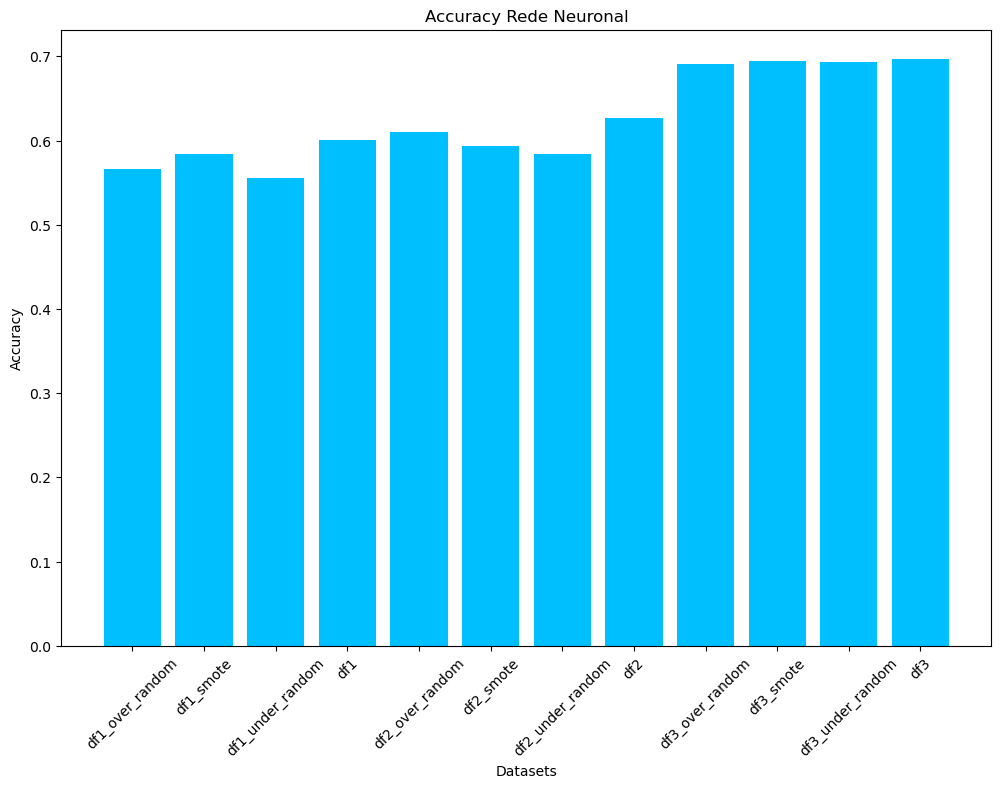

In [124]:
#accuracies para o logistic Regression
accuracies=[acc1_nr,acc1_ns,acc1_nru,acc1_n,acc2_nr,acc2_ns,acc2_nru,acc2_n,acc3_nr,acc3_ns,acc3_nru,acc3_n]

# nome dos datasets utilizados
data_names = ["df1_over_random", "df1_smote", "df1_under_random","df1","df2_over_random", "df2_smote", "df2_under_random","df2","df3_over_random", "df3_smote", "df3_under_random","df3"]  # Substitua pelos nomes reais

# Criação um gráfico de barras das accuracies dos modelos
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico conforme necessário
plt.bar(data_names, accuracies, color='deepskyblue')

# Adicione rótulos aos eixos e um título
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy Rede Neuronal')

plt.xticks(rotation=45)


plt.show()

Já a rede Neuronal obteve uns resultados identicos para os diferentes dataset destacando-se o df3 como previsto. Os desempenhos mantem-se identicos ao outro modelo, continuando com um desempenho máximo ligeramente superior a 70%.

## KNN

In [125]:
def knn_classifier(X_train, X_test, y_train, y_test, k, w, m, xt, nome):
    
    # Criação um modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)

    # Treinar o modelo 
    knn.fit(X_train, y_train)

    #previsões do y_test
    y_pred = knn.predict(X_test)

    accuracy = knn.score(X_test, y_test)
    print(f'Accuracy do modelo: {accuracy:.3f}')

    #matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xt, yticklabels=xt)
    plt.xlabel('Verdadeiro')
    plt.ylabel('Previsto')
    plt.title('Matriz de Confusão ' + nome)
    plt.show()
    
    return accuracy

Melhores hiperparâmetros encontrados:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy do modelo: 0.493


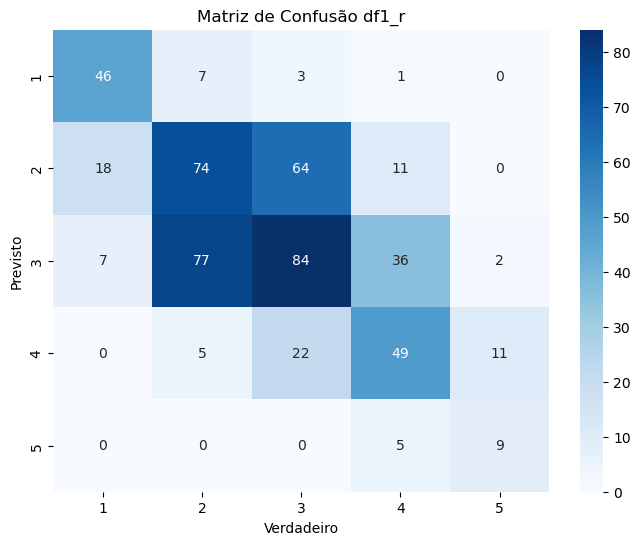

Accuracy do modelo: 0.480


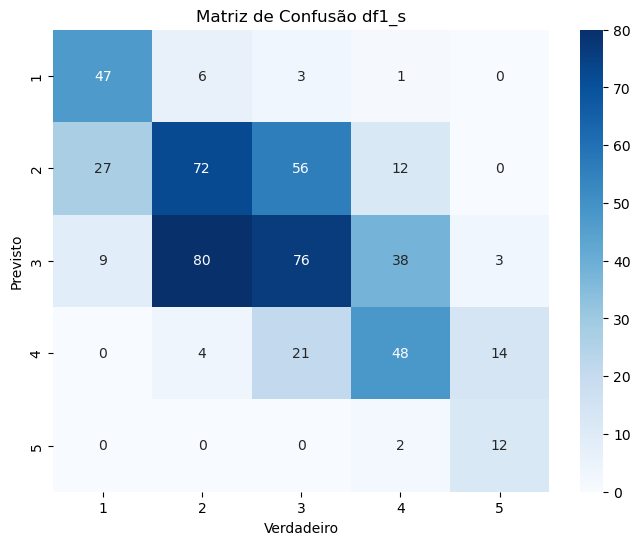

Melhores hiperparâmetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy do modelo: 0.473


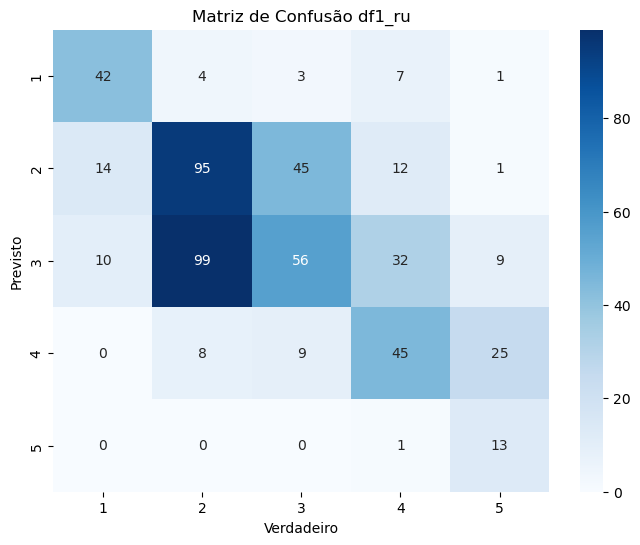

Melhores hiperparâmetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy do modelo: 0.554


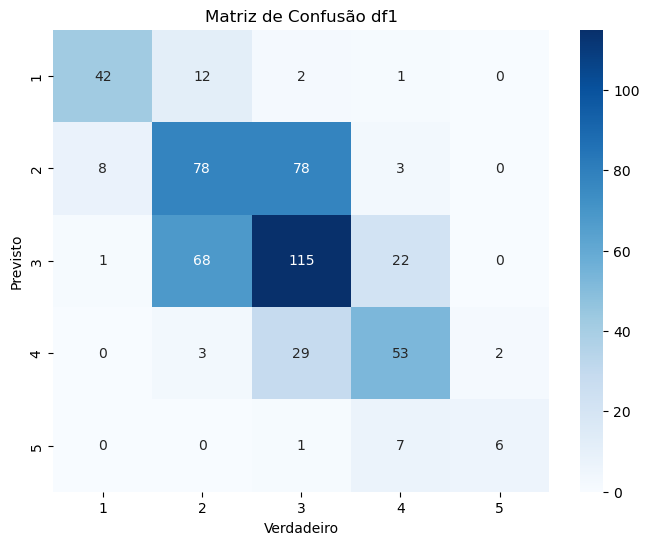

Melhores hiperparâmetros encontrados:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy do modelo: 0.559


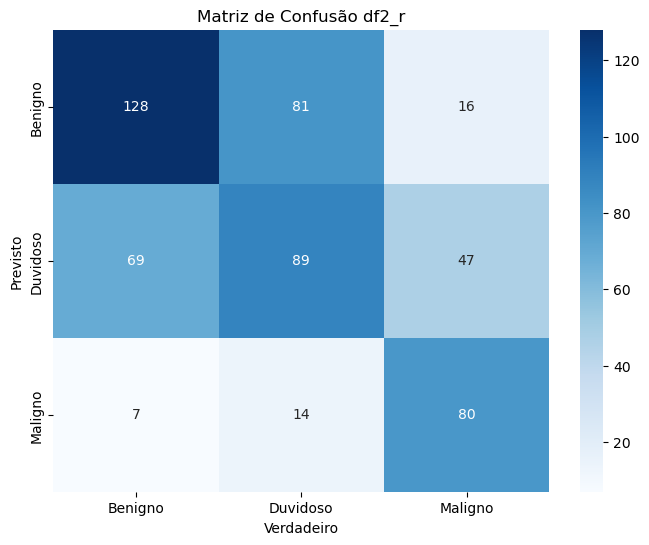

Accuracy do modelo: 0.556


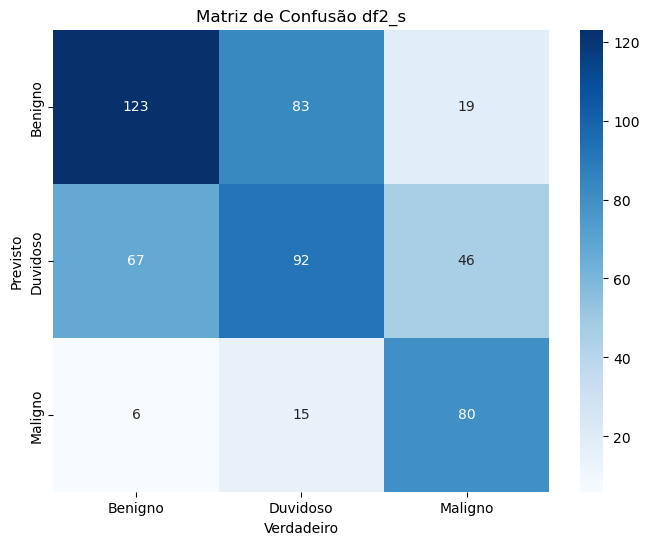

Melhores hiperparâmetros encontrados:
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy do modelo: 0.603


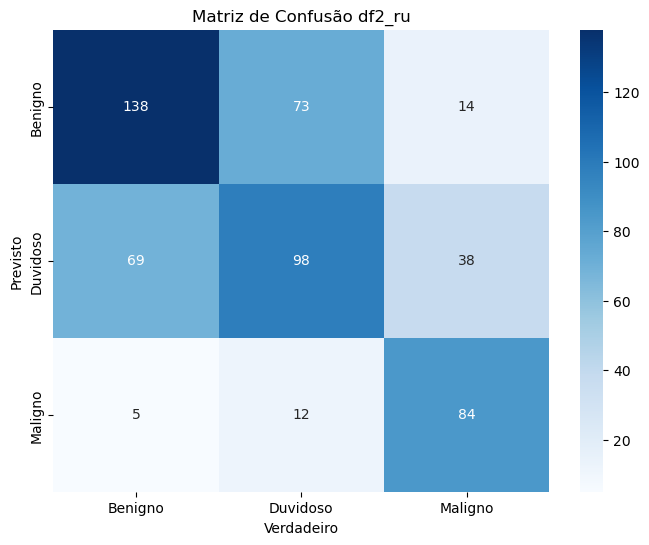

Melhores hiperparâmetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy do modelo: 0.576


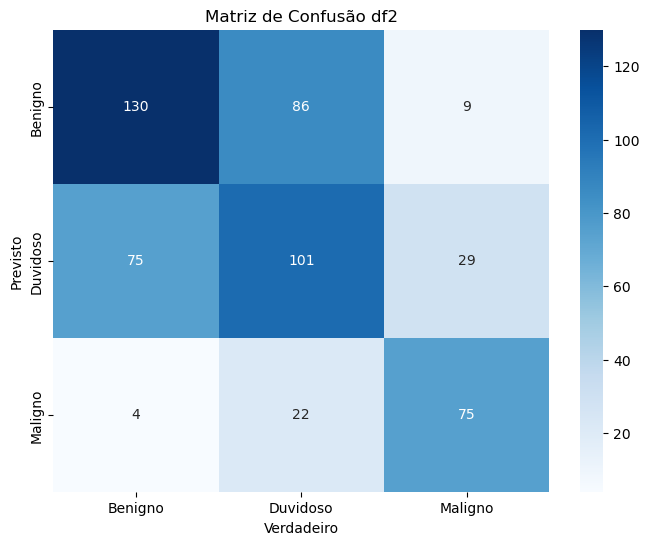

Melhores hiperparâmetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy do modelo: 0.650


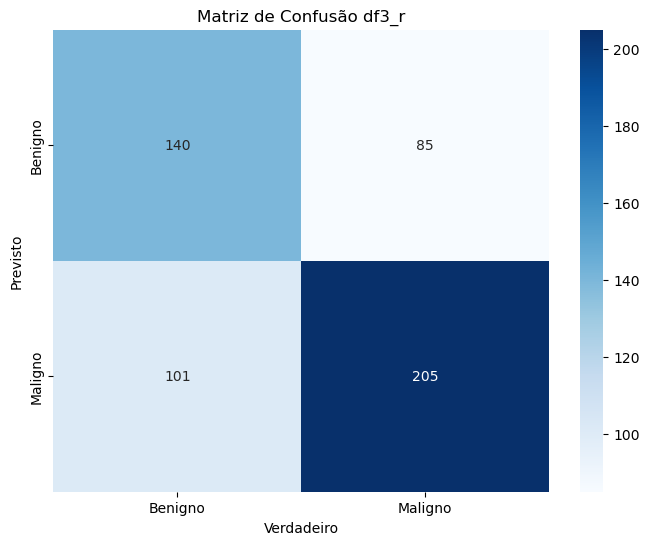

Accuracy do modelo: 0.665


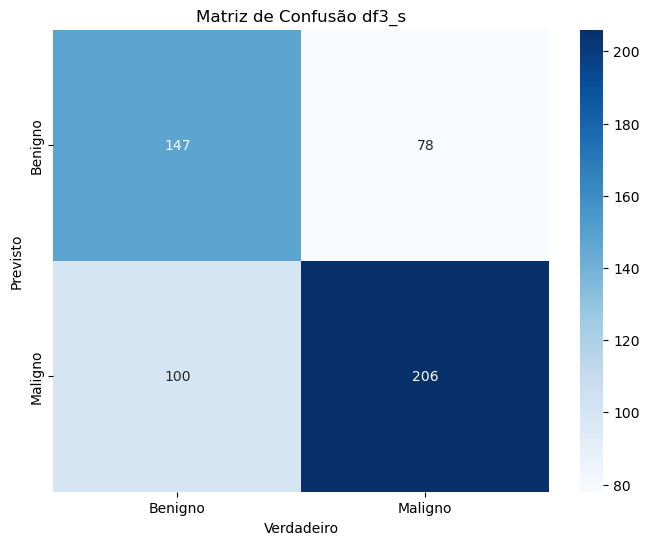

Melhores hiperparâmetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy do modelo: 0.680


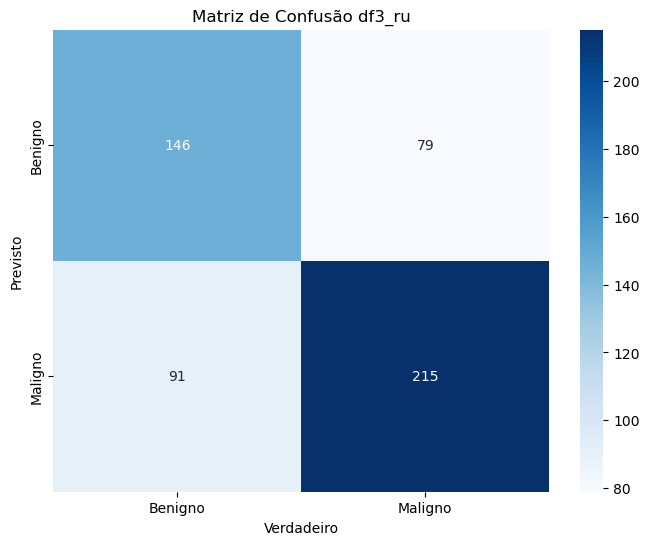

Melhores hiperparâmetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy do modelo: 0.693


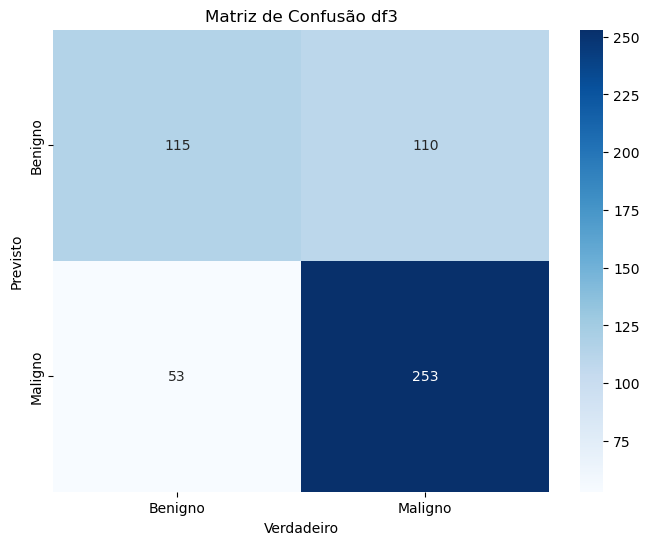

In [126]:
#parametros a procurar sobre o KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#nomes das classes do dataset df1
xt=['1', '2', '3', '4', '5']

#Procura dos parametros e treino do modelo para o dataset df1 e derivados dele
best=best_params_3(X1s_train, X1_test, y1s_train, y1_test, param_grid,KNeighborsClassifier())
ac1_kr=knn_classifier(X1r_train, X1_test, y1r_train, y1_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df1_r')
ac1_ks=knn_classifier(X1s_train, X1_test, y1s_train, y1_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df1_s')

#undersampling
best=best_params_3(X1ru_train, X1_test, y1ru_train, y1_test, param_grid,KNeighborsClassifier())
ac1_kru=knn_classifier(X1ru_train, X1_test, y1ru_train, y1_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df1_ru')

#df1
best=best_params_3(X1_train, X1_test, y1_train, y1_test, param_grid,KNeighborsClassifier())
ac1_k=knn_classifier(X1_train, X1_test, y1_train, y1_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df1')

#nomes das classes do dataset df2
xt=['Benigno','Duvidoso','Maligno']

#Procura dos parametros e treino do modelo para o dataset df2 e derivados dele
#oversampling
best=best_params_3(X2s_train, X2_test, y2s_train, y2_test, param_grid,KNeighborsClassifier())
ac2_kr=knn_classifier(X2r_train, X2_test, y2r_train, y2_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df2_r')
ac2_ks=knn_classifier(X2s_train, X2_test, y2s_train, y2_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df2_s')

#undersampling
best=best_params_3(X2ru_train, X2_test, y2ru_train, y2_test, param_grid,KNeighborsClassifier())
ac2_kru=knn_classifier(X2ru_train, X2_test, y2ru_train, y2_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df2_ru')

#df2
best=best_params_3(X2_train, X2_test, y2_train, y2_test, param_grid,KNeighborsClassifier())
ac2_k=knn_classifier(X2_train, X2_test, y2_train, y2_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df2')

#nomes das classes do dataset df3
xt=['Benigno','Maligno']

#Procura dos parametros e treino do modelo para o dataset df3 e derivados dele
#oversampling
best=best_params_3(X3s_train, X3_test, y3s_train, y3_test, param_grid,KNeighborsClassifier())
ac3_kr=knn_classifier(X3r_train, X3_test, y3r_train, y3_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df3_r')
ac3_ks=knn_classifier(X3s_train, X3_test, y3s_train, y3_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df3_s')

#undersampling
best=best_params_3(X3ru_train, X3_test, y3ru_train, y3_test, param_grid,KNeighborsClassifier())
ac3_kru=knn_classifier(X3ru_train, X3_test, y3ru_train, y3_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df3_ru')

#df3
best=best_params_3(X3_train, X3_test, y3_train, y3_test, param_grid,KNeighborsClassifier())
ac3_k=knn_classifier(X3_train, X3_test, y3_train, y3_test,best['n_neighbors'],best['weights'],best['metric'],xt,'df3')


### Accuracies

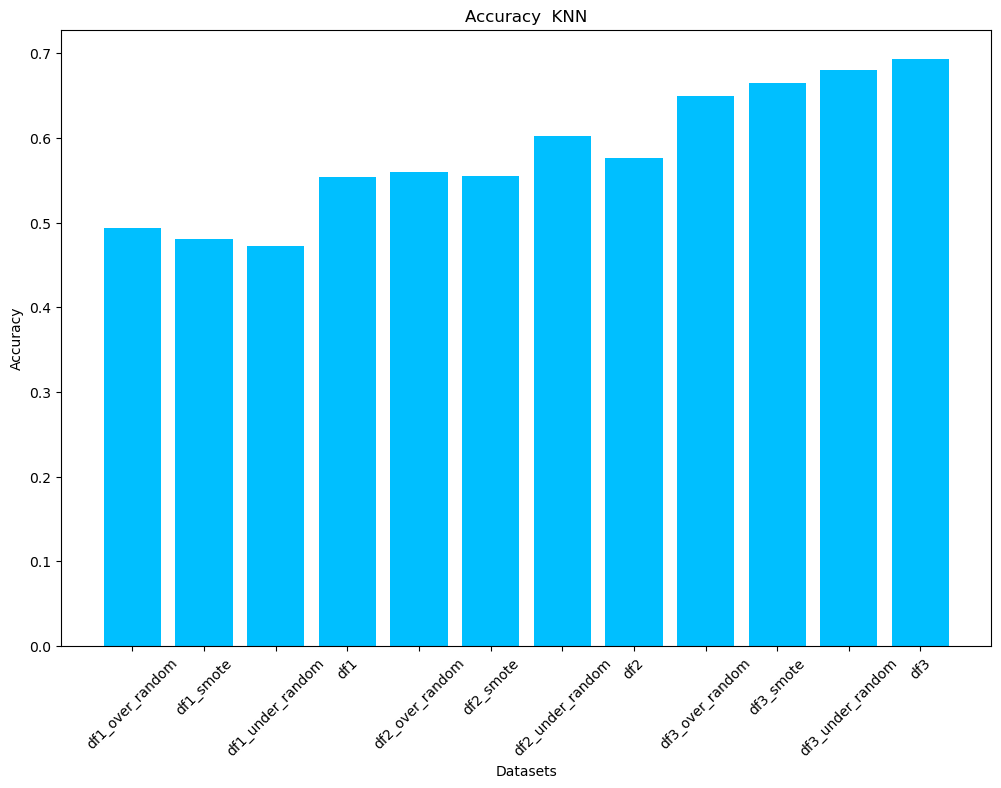

In [127]:
#valores das accuracies de todos os datasets usados
accuracies=[ac1_kr,ac1_ks,ac1_kru,ac1_k,ac2_kr,ac2_ks,ac2_kru,ac2_k,ac3_kr,ac3_ks,ac3_kru,ac3_k]

# nomes dos datasets correspondentes
data_names = ["df1_over_random", "df1_smote", "df1_under_random","df1","df2_over_random", "df2_smote", "df2_under_random","df2","df3_over_random", "df3_smote", "df3_under_random","df3"]  # Substitua pelos nomes reais

# Criação um gráfico de barras das accuracies dos modelos
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico conforme necessário
plt.bar(data_names, accuracies, color='deepskyblue')

# Adicione rótulos aos eixos e um título
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy  KNN')

plt.xticks(rotation=45)


plt.show()

Através da utilização do KNN conseguimos obter alguns desempenhos rasoáveis, principalmente nos casos em que utilizamos os dataset 2/3 balencados e não baleceados. Já era de esperar, como nos outros testes, que os dataset 3 tivessem melhor desempenho que os outros devido a terem menos classes a serem previstas.

## Decision Tree

In [128]:
def decision_tree_classifier(X_train, X_test, y_train, y_test,c,ma,mi_s,xt,nome):
    
   
    # criação do modelo 
    clf = DecisionTreeClassifier(criterion=c,max_depth=ma,min_samples_split=mi_s)
    
    # Treino do modelo 
    clf.fit(X_train, y_train)
    
    # previsões do y_teste
    y_pred = clf.predict(X_test)
    
    # Calcular a accuracy do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy do modelo: {accuracy:.3f}')
    
   #matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xt, yticklabels=xt)
    plt.xlabel('Verdadeiro')
    plt.ylabel('Previsto')
    plt.title('Matriz de Confusão ' + nome)
    plt.show()
    
    return accuracy



Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Accuracy do modelo: 0.456


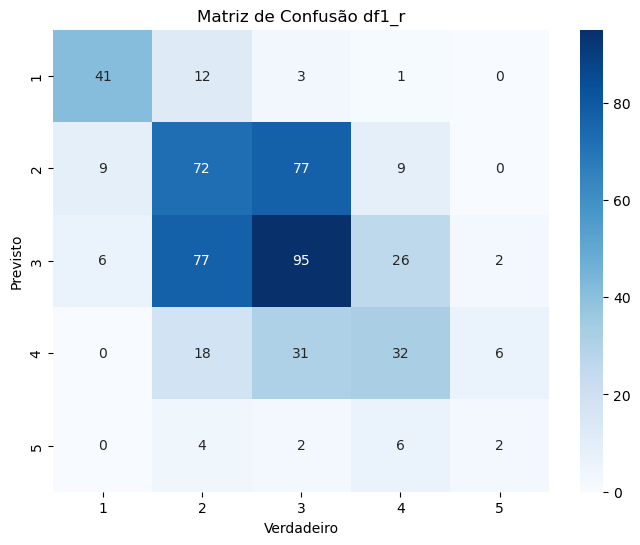

Accuracy do modelo: 0.469


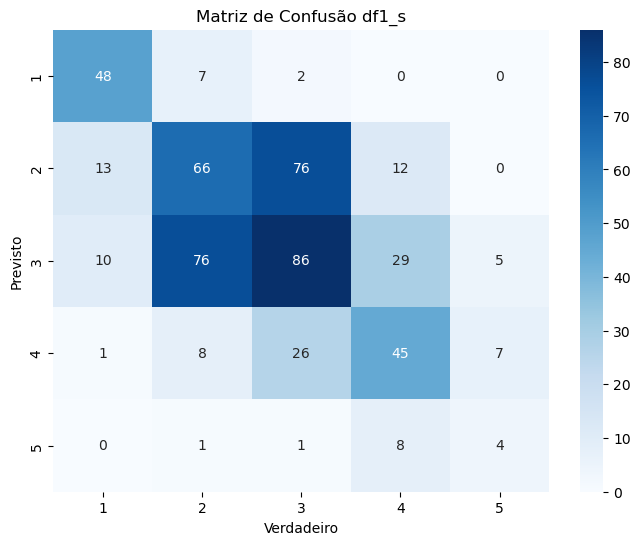

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Accuracy do modelo: 0.437


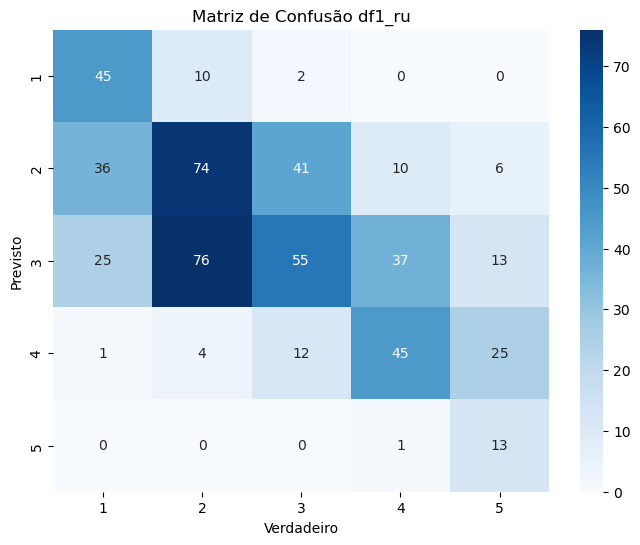

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Accuracy do modelo: 0.516


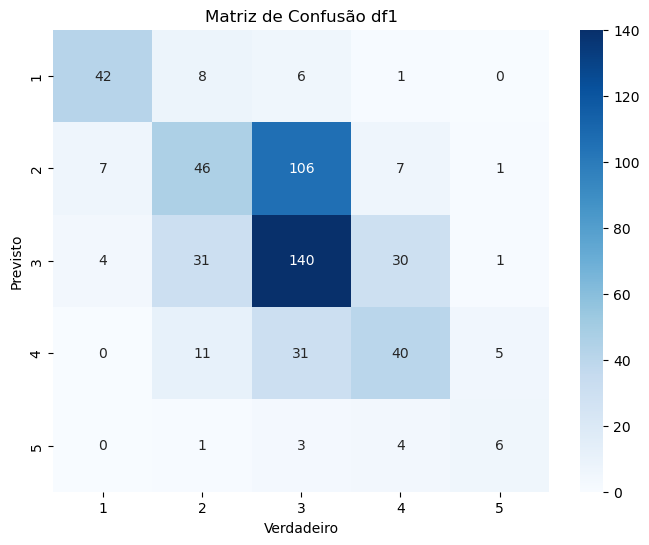

Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Accuracy do modelo: 0.601


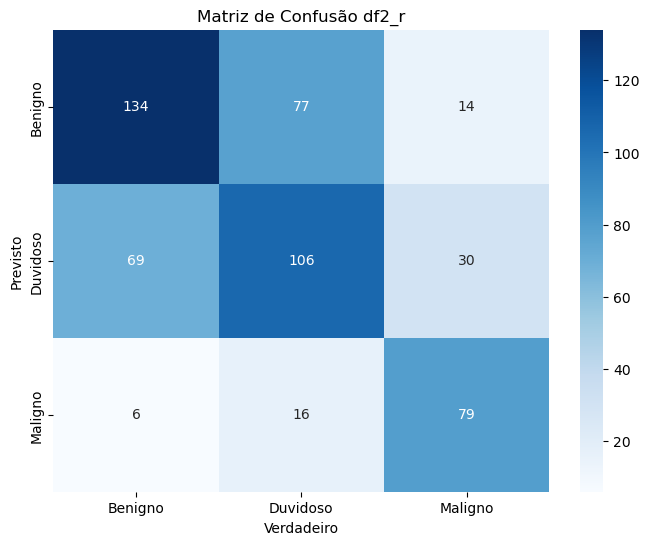

Accuracy do modelo: 0.565


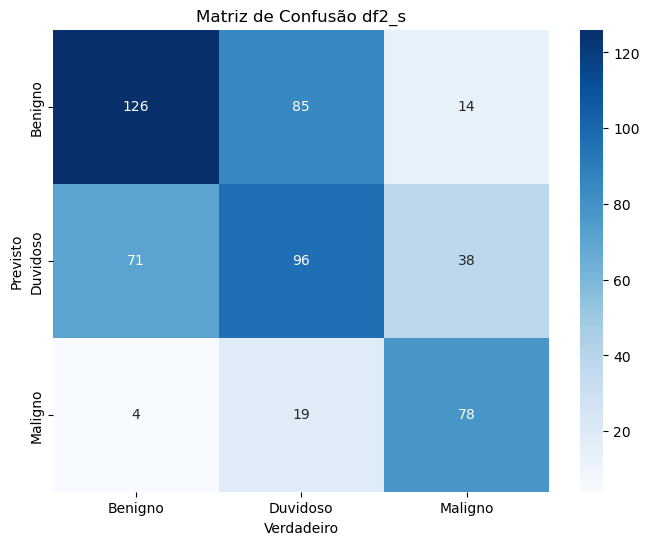

Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Accuracy do modelo: 0.576


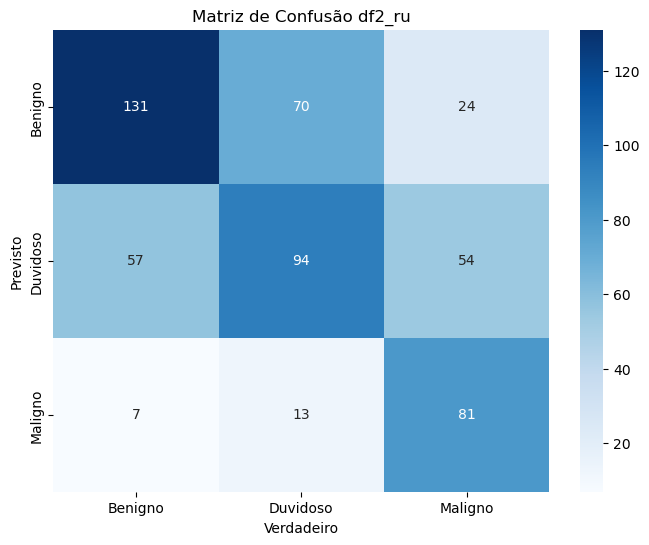

Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Accuracy do modelo: 0.586


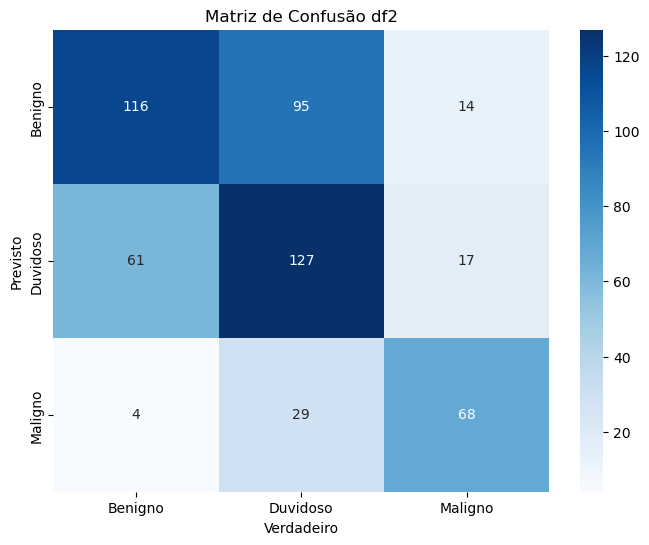

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Accuracy do modelo: 0.646


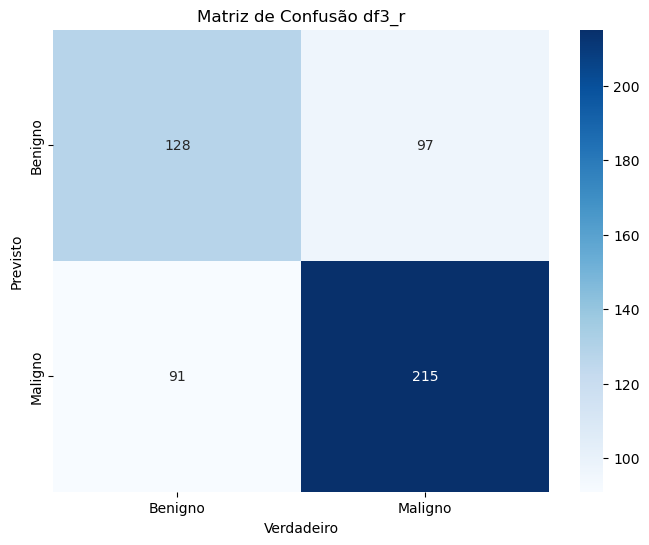

Accuracy do modelo: 0.646


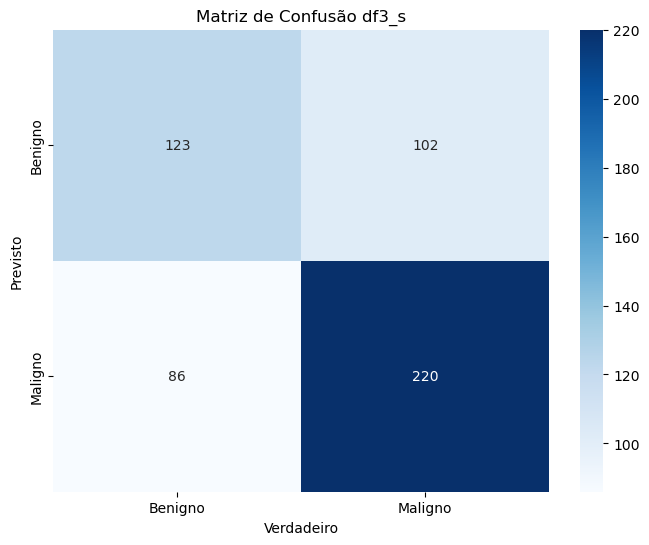

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Accuracy do modelo: 0.669


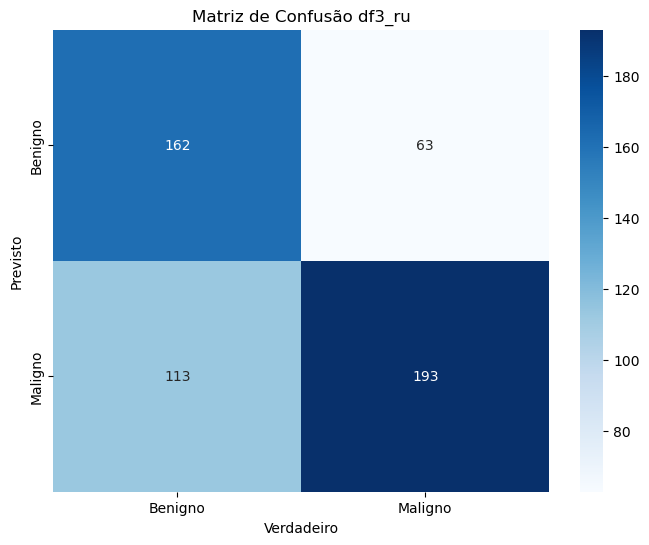

Melhores hiperparâmetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Accuracy do modelo: 0.680


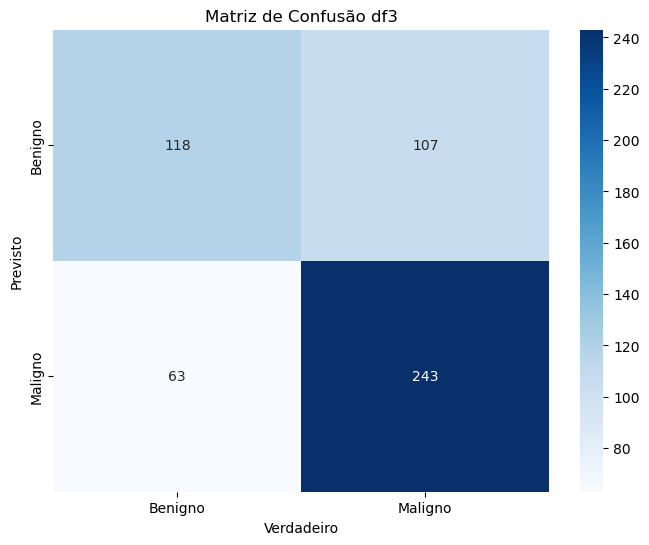

In [129]:
# parametros a procurar sobre a Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Função para medir a qualidade da divisão
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    
}

#nomes das classes do dataset df1
xt=['1', '2', '3', '4', '5']

#Procura dos parametros e treino do modelo para o dataset df1 e derivados dele
#oversampling
best=best_params_3(X1s_train, X1_test, y1s_train, y1_test, param_grid,DecisionTreeClassifier())
ac1_dr=decision_tree_classifier(X1r_train, X1_test, y1r_train, y1_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df1_r')
ac1_ds=decision_tree_classifier(X1s_train, X1_test, y1s_train, y1_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df1_s')

#undersampling
best=best_params_3(X1ru_train, X1_test, y1ru_train, y1_test, param_grid,DecisionTreeClassifier())
ac1_dru=decision_tree_classifier(X1ru_train, X1_test, y1ru_train, y1_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df1_ru')

#df1
best=best_params_3(X1_train, X1_test, y1_train, y1_test, param_grid,DecisionTreeClassifier())
ac1_d=decision_tree_classifier(X1_train, X1_test, y1_train, y1_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df1')

#nomes das classes do dataset df2
xt=['Benigno','Duvidoso','Maligno']

#Procura dos parametros e treino do modelo para o dataset df2 e derivados dele
#oversampling
best=best_params_3(X2s_train, X2_test, y2s_train, y2_test, param_grid,DecisionTreeClassifier())
ac2_dr=decision_tree_classifier(X2r_train, X2_test, y2r_train, y2_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df2_r')
ac2_ds=decision_tree_classifier(X2s_train, X2_test, y2s_train, y2_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df2_s')

#undersampling
best=best_params_3(X2ru_train, X2_test, y2ru_train, y2_test, param_grid,DecisionTreeClassifier())
ac2_dru=decision_tree_classifier(X2ru_train, X2_test, y2ru_train, y2_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df2_ru')

#df2
best=best_params_3(X2_train, X2_test, y2_train, y2_test, param_grid,DecisionTreeClassifier())
ac2_d=decision_tree_classifier(X2_train, X2_test, y2_train, y2_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df2')

#nomes das classes do dataset df3
xt=['Benigno','Maligno']

#Procura dos parametros e treino do modelo para o dataset df3 e derivados dele
#oversampling
best=best_params_3(X3s_train, X3_test, y3s_train, y3_test, param_grid,DecisionTreeClassifier())
ac3_dr=decision_tree_classifier(X3r_train, X3_test, y3r_train, y3_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df3_r')
ac3_ds=decision_tree_classifier(X3s_train, X3_test, y3s_train, y3_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df3_s')

#undersampling
best=best_params_3(X3ru_train, X3_test, y3ru_train, y3_test, param_grid,DecisionTreeClassifier())
ac3_dru=decision_tree_classifier(X3ru_train, X3_test, y3ru_train, y3_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df3_ru')

#df3
best=best_params_3(X3_train, X3_test, y3_train, y3_test, param_grid,DecisionTreeClassifier())
ac3_d=decision_tree_classifier(X3_train, X3_test, y3_train, y3_test,best['criterion'],best['max_depth'],best['min_samples_split'],xt,'df3')


### Accuracies

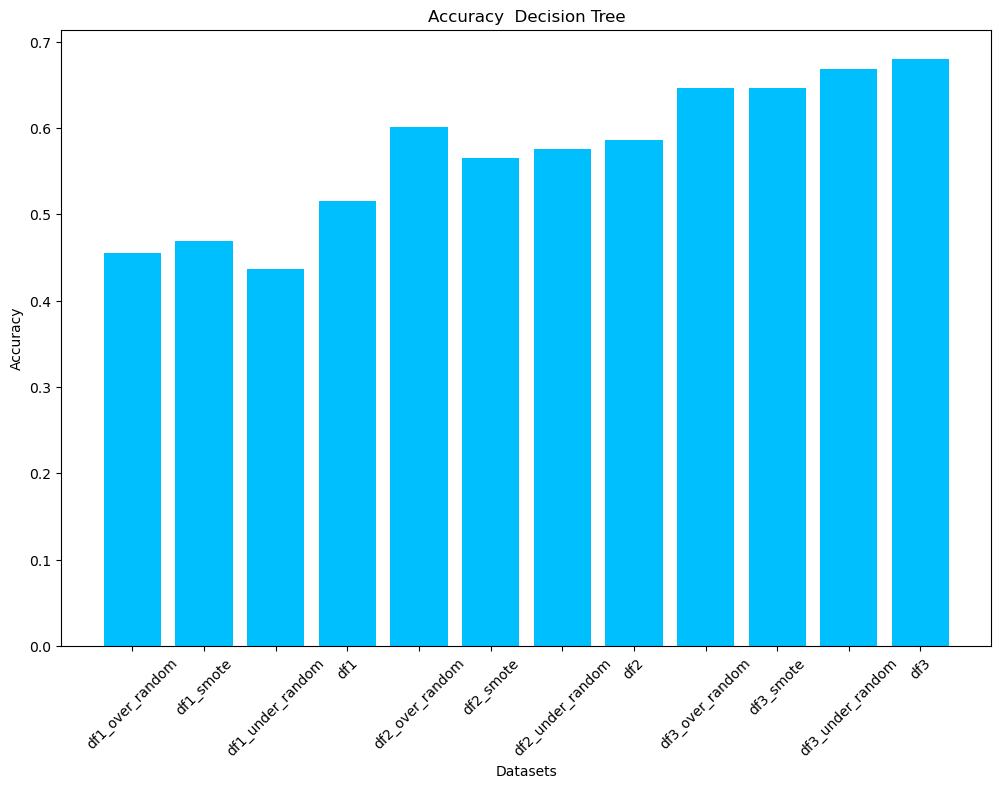

In [130]:
#accuracies dos datsets utilizados no modelo
accuracies=[ac1_dr,ac1_ds,ac1_dru,ac1_d,ac2_dr,ac2_ds,ac2_dru,ac2_d,ac3_dr,ac3_ds,ac3_dru,ac3_d]

# nomes dos datsets correspondentes
data_names = ["df1_over_random", "df1_smote", "df1_under_random","df1","df2_over_random", "df2_smote", "df2_under_random","df2","df3_over_random", "df3_smote", "df3_under_random","df3"]  # Substitua pelos nomes reais

# Criação um gráfico de barras das accuracies dos modelos
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico conforme necessário
plt.bar(data_names, accuracies, color='deepskyblue')

# Adicionar rótulos aos eixos e um título
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy  Decision Tree')

plt.xticks(rotation=45)


plt.show()

Com a visulização dos resultados obtidos das nossas decision tree percebemos que os desempenhos mantem-se identicos aos obtidos nos outros modelos, com uma melhor desempenho dos dataset3.

## Random Forest

In [131]:
def random_forest_classifier(X_train, X_test, y_train, y_test,n, depth,min_split,xt,nome):
    
    # Criar o modelo 
    clf = RandomForestClassifier(n_estimators=n, max_depth=depth, min_samples_split=min_split)
    
    # Treinar o modelo 
    clf.fit(X_train, y_train)
    
    # previsões com os dados de teste
    y_pred = clf.predict(X_test)
    
    # Calcular a accuracy do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia do modelo: {accuracy:.3f}')
    
    #matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xt, yticklabels=xt)
    plt.xlabel('Verdadeiro')
    plt.ylabel('Previsto')
    plt.title('Matriz de Confusão ' + nome)
    plt.show()
    
    return accuracy

Melhores hiperparâmetros encontrados:
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia do modelo: 0.537


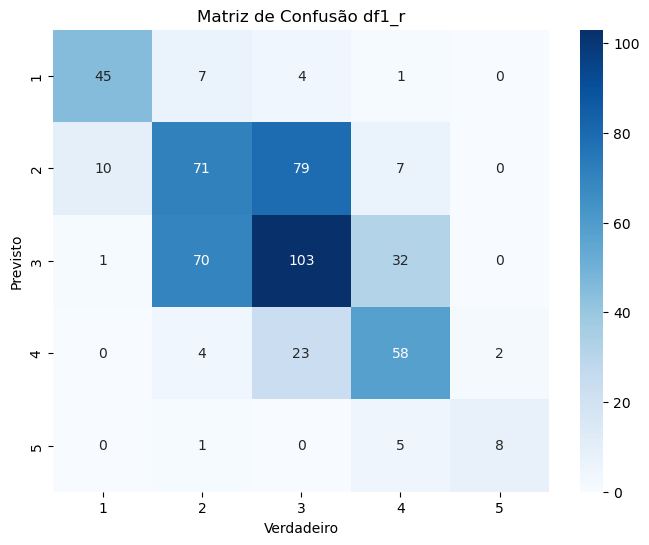

Acurácia do modelo: 0.527


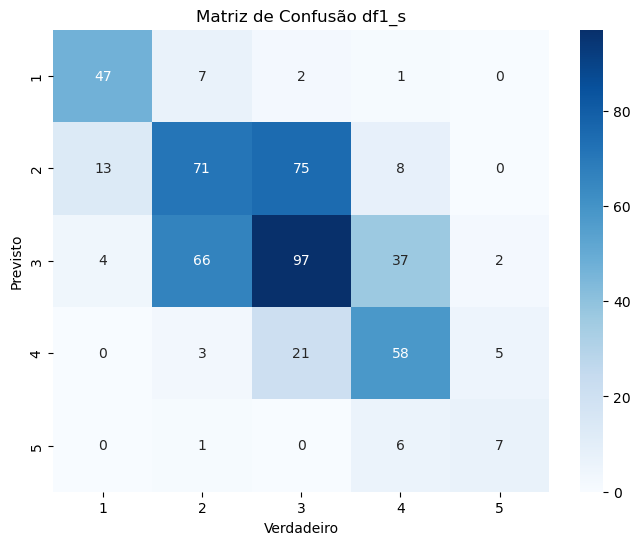

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 30}
Acurácia do modelo: 0.467


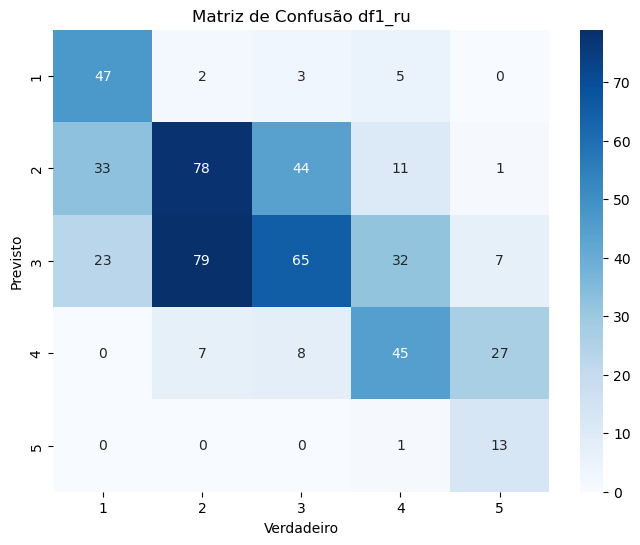

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Acurácia do modelo: 0.561


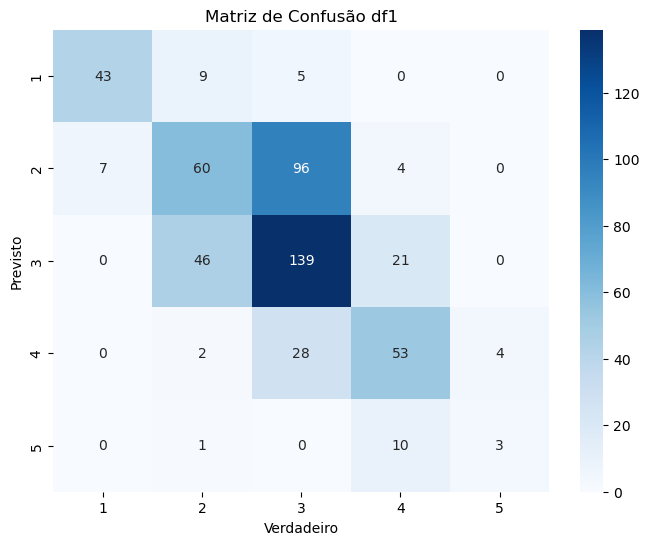

Melhores hiperparâmetros encontrados:
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia do modelo: 0.608


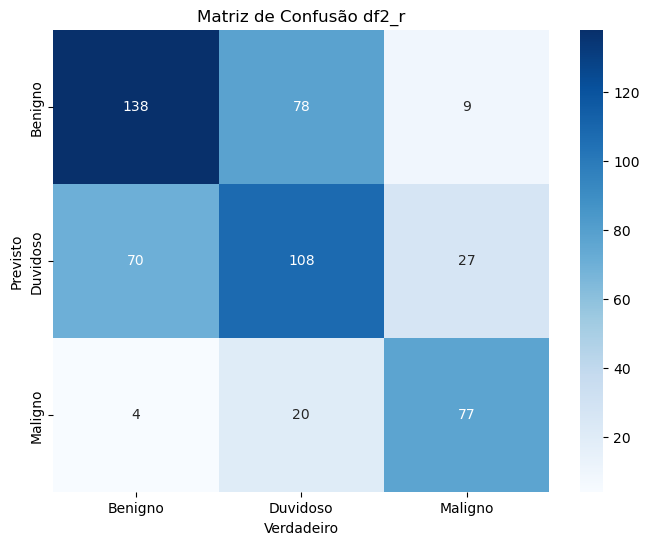

Acurácia do modelo: 0.586


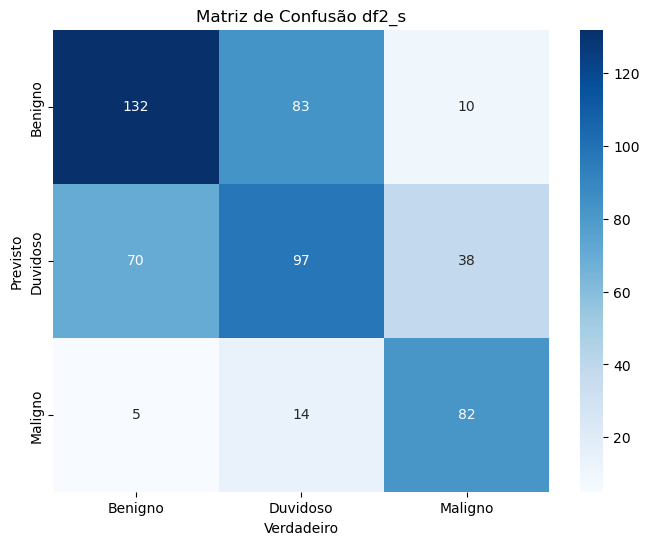

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Acurácia do modelo: 0.620


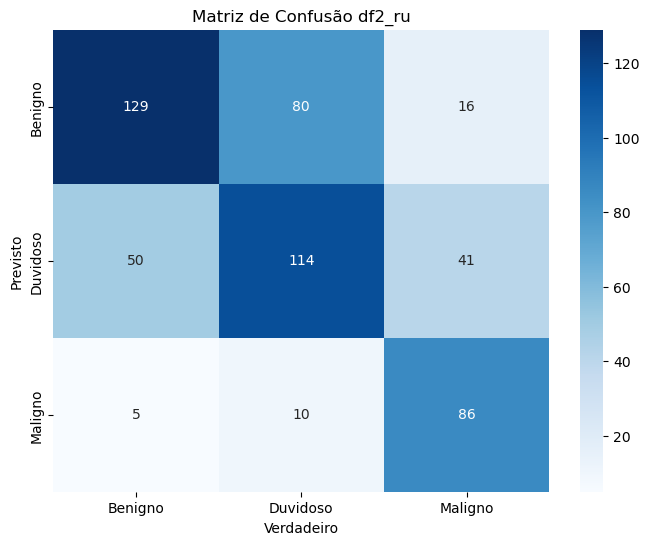

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Acurácia do modelo: 0.621


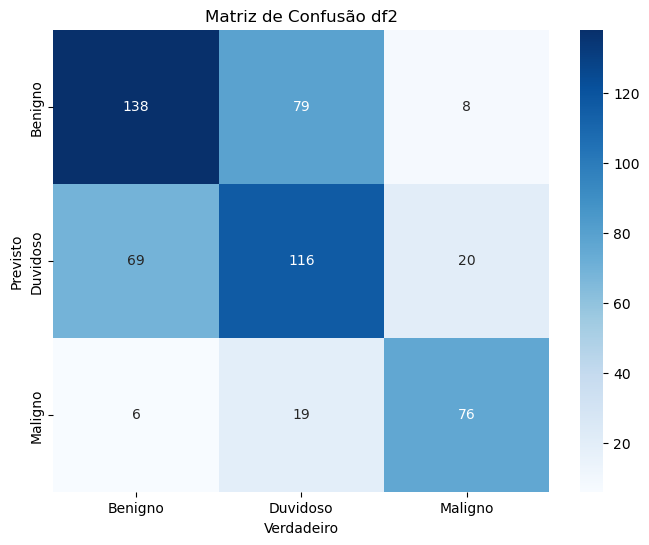

Melhores hiperparâmetros encontrados:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 60}
Acurácia do modelo: 0.685


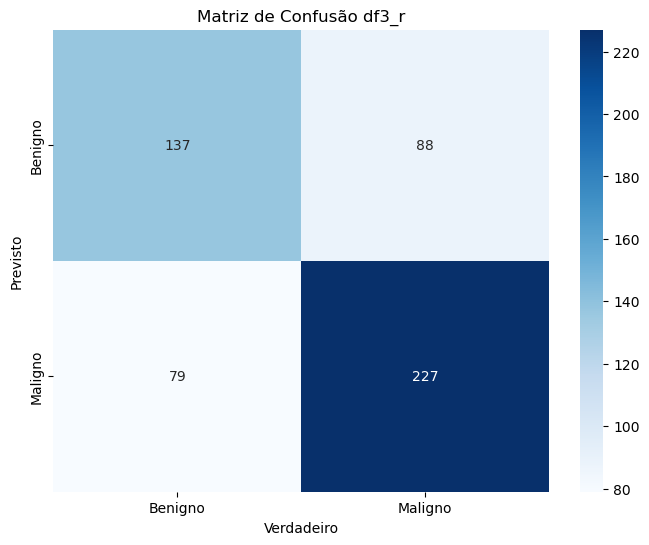

Acurácia do modelo: 0.680


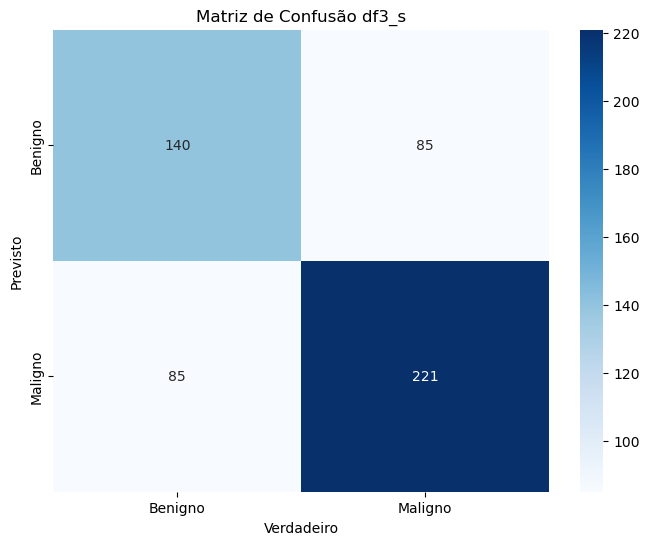

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Acurácia do modelo: 0.689


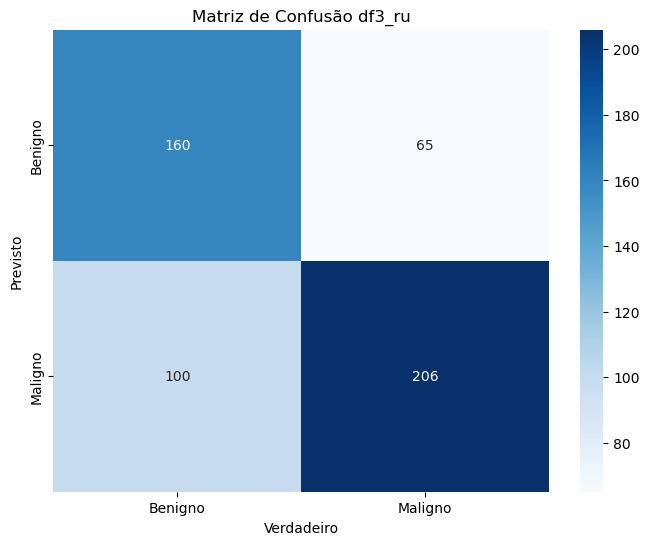

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 60}
Acurácia do modelo: 0.712


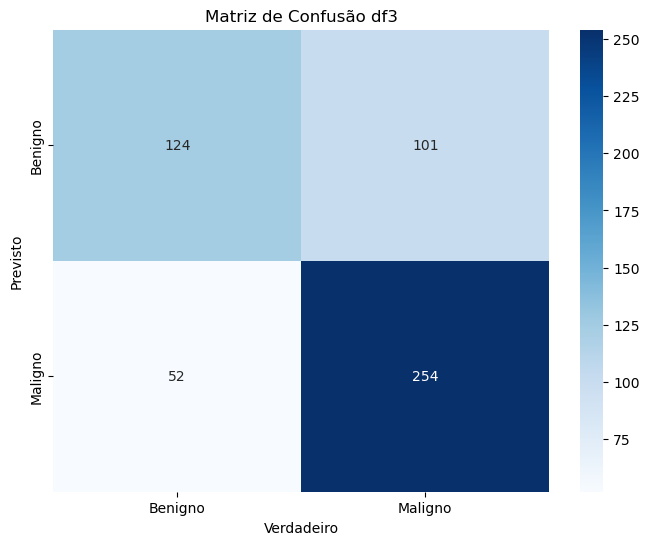

In [132]:
# parametros a procurar sobre o Random Forest
param_grid = {
    'n_estimators': [30, 60, 100],  # Número de árvores no conjunto
    'max_depth': [10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
}

#nomes das classes do dataset df1
xt=['1', '2', '3', '4', '5']

#Procura dos parametros e treino do modelo para o dataset df1 e derivados dele
#oversampling
best=best_params_3(X1s_train, X1_test, y1s_train, y1_test, param_grid,RandomForestClassifier())
ac1_rr=random_forest_classifier(X1r_train, X1_test, y1r_train, y1_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df1_r')
ac1_rs=random_forest_classifier(X1s_train, X1_test, y1s_train, y1_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df1_s')

#undersampling
best=best_params_3(X1ru_train, X1_test, y1ru_train, y1_test, param_grid,RandomForestClassifier())
ac1_rru=random_forest_classifier(X1ru_train, X1_test, y1ru_train, y1_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df1_ru')

#df1
best=best_params_3(X1_train, X1_test, y1_train, y1_test, param_grid,RandomForestClassifier())
ac1_r=random_forest_classifier(X1_train, X1_test, y1_train, y1_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df1')

#nomes das classes do dataset df2
xt=['Benigno','Duvidoso','Maligno']

#Procura dos parametros e treino do modelo para o dataset df2 e derivados dele
#oversampling
best=best_params_3(X2s_train, X2_test, y2s_train, y2_test, param_grid,RandomForestClassifier())
ac2_rr=random_forest_classifier(X2r_train, X2_test, y2r_train, y2_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df2_r')
ac2_rs=random_forest_classifier(X2s_train, X2_test, y2s_train, y2_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df2_s')

#undersampling
best=best_params_3(X2ru_train, X2_test, y2ru_train, y2_test, param_grid,RandomForestClassifier())
ac2_rru=random_forest_classifier(X2ru_train, X2_test, y2ru_train, y2_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df2_ru')

#df2
best=best_params_3(X2_train, X2_test, y2_train, y2_test, param_grid,RandomForestClassifier())
ac2_r=random_forest_classifier(X2_train, X2_test, y2_train, y2_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df2')

#nomes das classes do dataset df3
xt=['Benigno','Maligno']

#Procura dos parametros e treino do modelo para o dataset df3 e derivados dele
#oversampling
best=best_params_3(X3s_train, X3_test, y3s_train, y3_test, param_grid,RandomForestClassifier())
ac3_rr=random_forest_classifier(X3r_train, X3_test, y3r_train, y3_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df3_r')
ac3_rs=random_forest_classifier(X3s_train, X3_test, y3s_train, y3_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df3_s')

#undersampling
best=best_params_3(X3ru_train, X3_test, y3ru_train, y3_test, param_grid,RandomForestClassifier())
ac3_rru=random_forest_classifier(X3ru_train, X3_test, y3ru_train, y3_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df3_ru')

#df3
best=best_params_3(X3_train, X3_test, y3_train, y3_test, param_grid,RandomForestClassifier())
ac3_r=random_forest_classifier(X3_train, X3_test, y3_train, y3_test,best['n_estimators'],best['max_depth'],best['min_samples_split'],xt,'df3')

### Accuracies

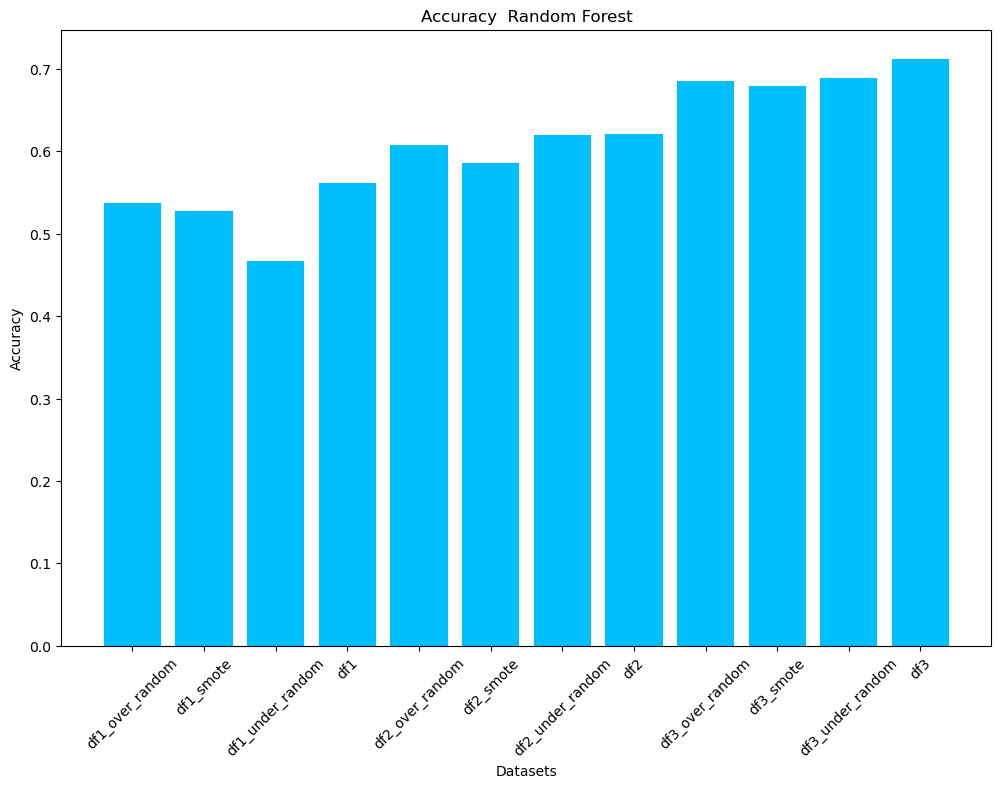

In [133]:
#accuracies dos datasets no random forest 
accuracies=[ac1_rr,ac1_rs,ac1_rru,ac1_r,ac2_rr,ac2_rs,ac2_rru,ac2_r,ac3_rr,ac3_rs,ac3_rru,ac3_r]

# nomes dos datasets correspondentes
data_names = ["df1_over_random", "df1_smote", "df1_under_random","df1","df2_over_random", "df2_smote", "df2_under_random","df2","df3_over_random", "df3_smote", "df3_under_random","df3"]  # Substitua pelos nomes reais

# Criação de um gráfico de barras das accuracies dos modelos
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico conforme necessário
plt.bar(data_names, accuracies, color='deepskyblue')

# Adicionar rótulos aos eixos e um título
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy  Random Forest')

plt.xticks(rotation=45)


plt.show()

Agora testando o random forest, verificamos algumas melhorias relativamentos a outros modelos, a nivel do dataset1 já conseguimos ter quase todos com um desemprenho melhor que random, em geral os desempenhos são ligeiramente melhores.

## Conclusão

Depois de testarmos estes modelos com os diferentes datasets verificamos que em geral o df3 obtem melhor desempenho do que todos os outros. 
O df1 em geral não obtem desempenhos nada bons, nem os seus balenceamentos. O df2 já consegue obter uns resultados melhores.
A nível de algoritmos, os resultados são idênticos e podemos verificar um melhor desempenho, apesar de pequena a diferença na Rede Neuronal, mas muito identicos no Random Forest e na Regressão Logística.